<h1>Lab Course Machine Learning
Exercise Sheet 1

<h1>Python Warmup

<h2>Question 1

In [145]:
import csv
import codecs
import urllib.request
from collections import Counter
import glob
import codecs
import re
import pandas as pd
import math
from cmath import exp
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

<h4>[2 points] In this part of the assignment, you have to write a word count program. Your program should
read the provided text document on learnweb named random text.txt and then output the following stats:

In [146]:

filepath = "/Users/farjad.ahmed/Documents/Studies/ML Lab/Exercise_01/random_text.txt"
with open(filepath) as f:
    sentences= f.readlines()

In [147]:

# print(stopwords.words('english'))

In [148]:
bigString = ''
for sent in sentences:
    bigString = bigString + sent

import string
bigString = bigString.translate(str.maketrans('', '', string.punctuation))
tokens = nltk.word_tokenize(bigString)

In [149]:
stop_words = set(stopwords.words('english'))
word_tokens = nltk.word_tokenize(bigString)
sentence_filtered = [w for w in word_tokens if not w.lower() in stop_words]
sentence_filtered = []
for word in word_tokens:
    if word not in stop_words:
        sentence_filtered.append(word)

<h3>Part a

<h4>a) The number of unique non-stop words.(Hint: you can use ”nltk” library to get a list of English language stop words.)

In [150]:
len(sentence_filtered)

615

In [151]:
# Finding the unique set of words that do not repeat
len(list(set(sentence_filtered)))

403

<h3>Part b

<h4>b) The top 5 most frequent non-stop words.

In [152]:
from collections import Counter
myDict = Counter(sentence_filtered)
countList = list(myDict.items())
getList = sorted(countList, key=lambda x: x[1], reverse=True)
getList[:5]

[('Harry', 26), ('Voldemort', 9), ('also', 8), ('He', 8), ('Dark', 7)]

<h1>Question 2

<h4>[2 points] In a sib1ple regression probleb1 we fit a straight line y = b1x + b to a given data. However, not
all probleb1s in nature are by default linear. Given the data below see if a straight line is a good fit.

<h4>In cases where the data does not follow a linear trend, one can transforb1 the variables and then apply the
linear regression technique to better fit the data. Frob1 the given choices, try which function would be a
better representation for the data.

(a) Linear : y = b1x + b
(b) Power : y = bxm
(c) Exponential : y = bemx
(d) Logarithmic : y = mlogx + b
(e) Reciprocal : y = 1/(mx+b)

Generate a 2 x 2 subplot with the following techniques, plot, semilogx, semilogy, loglog. Read about these
plotting techniques. These plots will let you understand which of the above 5 choices will be the best fit.
Plot the data points and the best fit curve in a well-formatted plot with axis labels, title and the legend.
(Hint: you can use the polyfit function from numpy for this part.)

<h1> Plotting all equations for all plotting methods. Answer: Power Estimates the data the best, it is evident from the working below.

In [153]:
d = {'x': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 'y': [6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64]}
df = pd.DataFrame(data=d)

In [154]:
plt.rcParams['figure.figsize'] = [15, 15]

In [155]:
x_2 = df['x'].to_numpy()
y_1 = df['y'].to_numpy()
xm = np.mean(x_2)
ym = np.mean(y_1)
b1 = np.sum((x_2-xm)*(y_1-ym))/(np.sum((x_2-xm)**2))
b0 = ym - b1*xm
print('b1: {} and b0: {}'.format(b1,b0))

b1: -1.022181818181818 and b0: 5.005454545454546


In [156]:
m = b1 #gradient
b = b0 #intercept

In [157]:
x_2 = df['x']
Y = [m*x_2+b, b*pow(x_2,m), b*np.exp(x_2*m), m*np.log(x_2) + b, 1/(m*x_2 + b)]

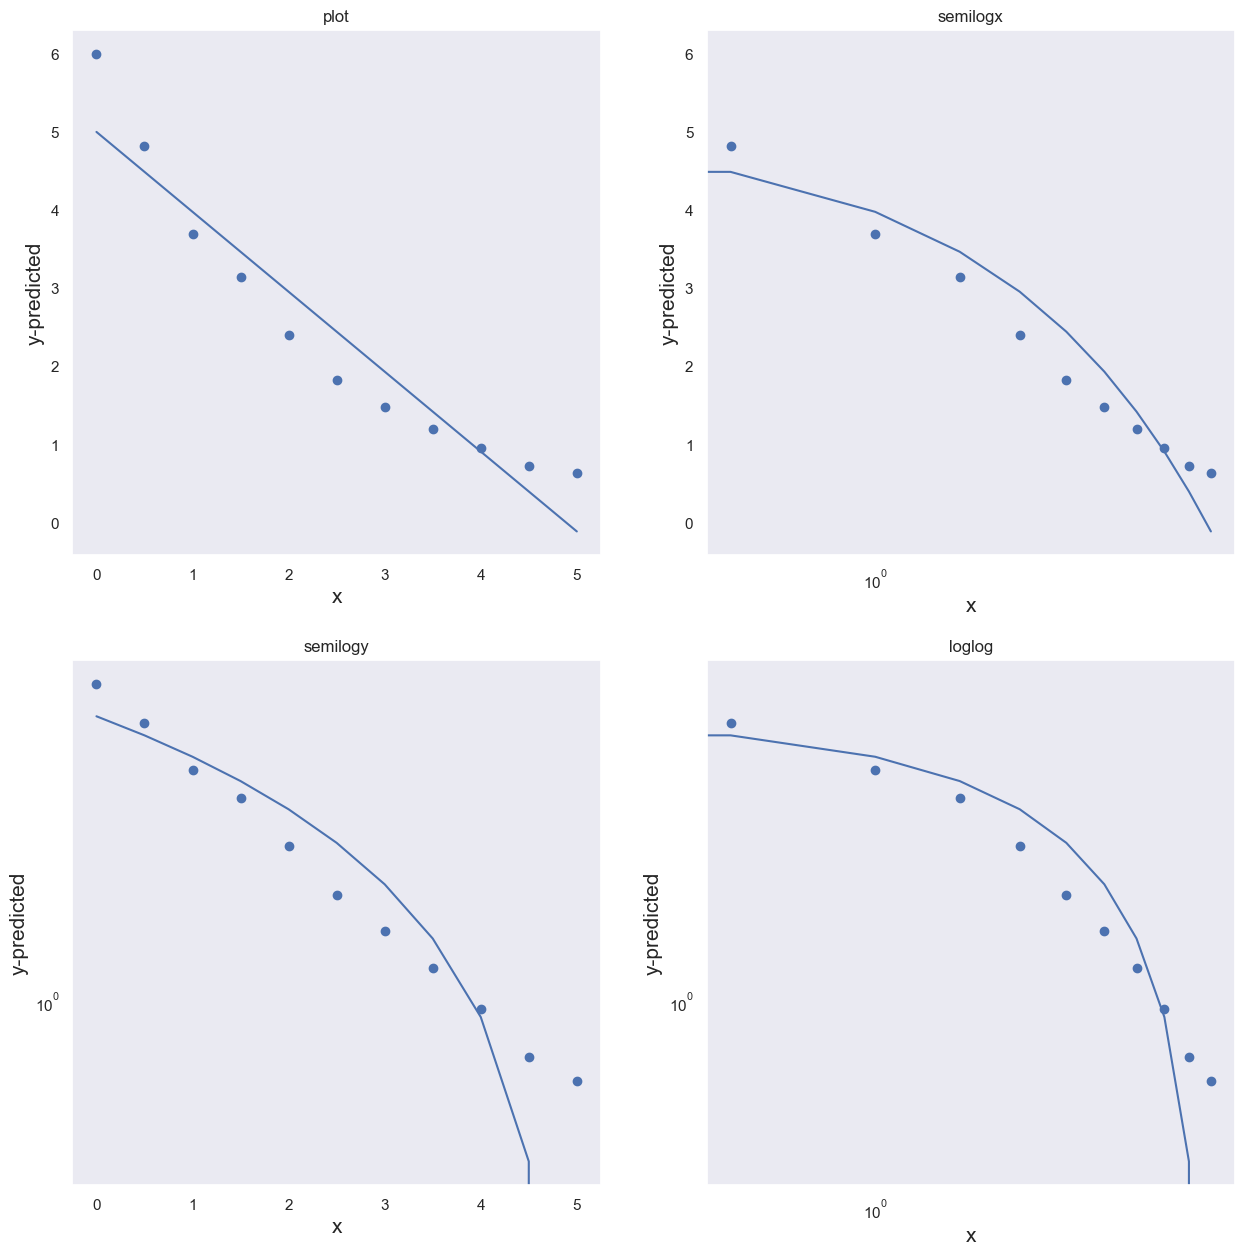

In [158]:
fig = plt.figure()
x_2 = df['x']
y = Y[0]
plt.subplot(2,2,1)
plt.scatter(df['x'], df['y'], label='Original Data')
plt.plot(x_2, y, label='y=mx+c')
plt.title('plot')
plt.xlabel('x', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.scatter(df['x'], df['y'], label='Original Data')
plt.semilogx(x_2, y, label='y=mx+c')
plt.title('semilogx')
plt.xlabel('x', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.scatter(df['x'], df['y'], label='Original Data')
plt.semilogy(x_2, y, label='y=mx+c')
plt.title('semilogy')
plt.xlabel('x', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.scatter(df['x'], df['y'], label='Original Data')
plt.loglog(x_2, y, label='y=mx+c')
plt.title('loglog')
plt.xlabel('x', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
plt.grid()
plt.show()

<h2>Plot

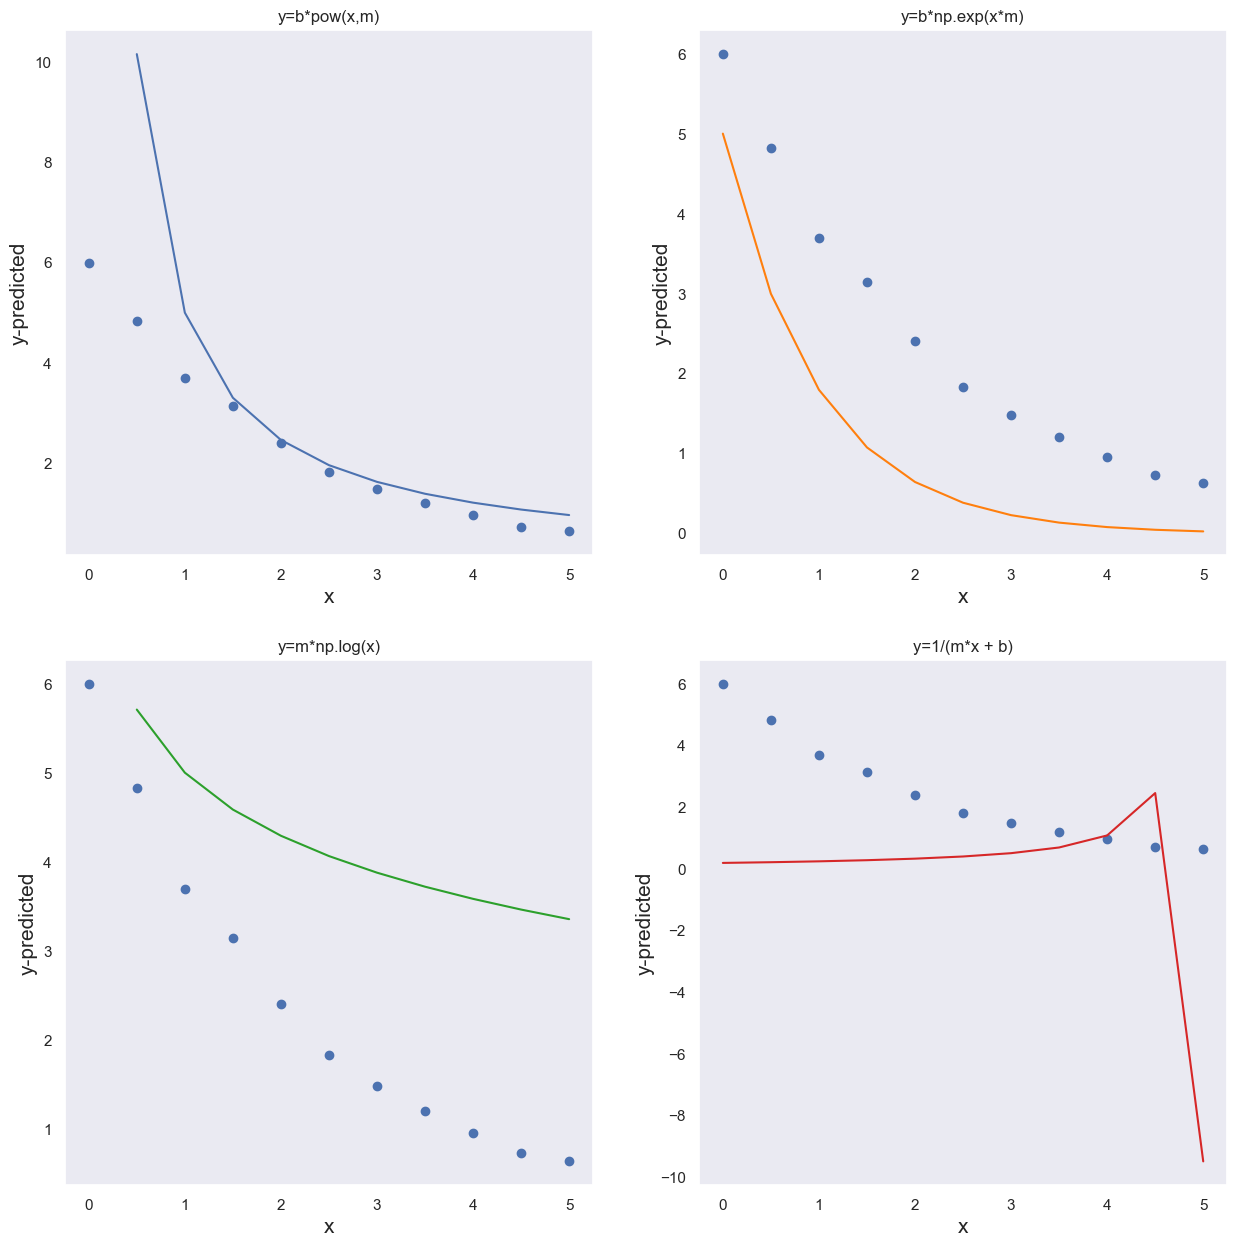

In [159]:
fig_1, axs = plt.subplots(2, 2)
# plt.rcParams['figure.figsize'] = [15, 15]
axs[0, 0].plot(x_2, Y[1])
axs[0, 0].scatter(df['x'], df['y'])
axs[0, 0].set_title('y=b*pow(x,m)')

axs[0, 1].plot(x_2, Y[2], 'tab:orange')
axs[0, 1].set_title('y=b*np.exp(x*m)')
axs[0,1].scatter(df['x'], df['y'])

axs[1, 0].plot(x_2, Y[3], 'tab:green')
axs[1, 0].set_title('y=m*np.log(x)')
axs[1,0].scatter(df['x'], df['y'])

axs[1, 1].plot(x_2, Y[4], 'tab:red')
axs[1, 1].set_title('y=1/(m*x + b)')
axs[1,1].scatter(df['x'], df['y'])

for ax in axs.flat:
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y-predicted', fontsize=15)
    ax.grid()

<h2>Semilogx

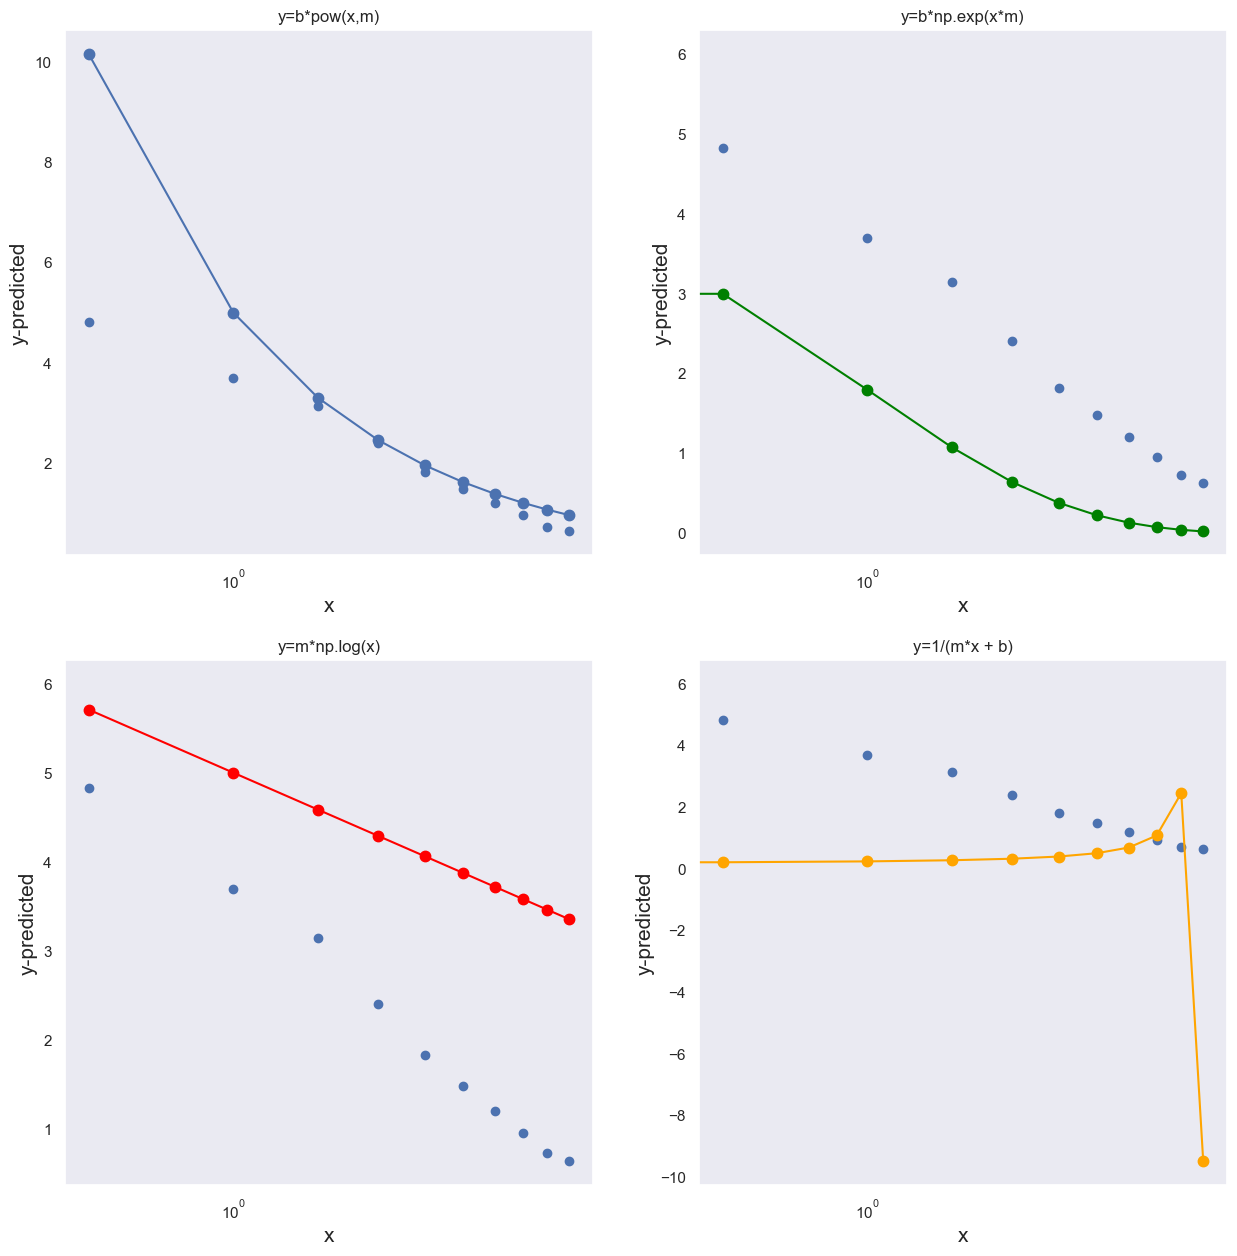

In [160]:
y =y_1
# plt.semilogx(x,y, marker='.', markersize=15, color='green')
fig_1, axs = plt.subplots(2, 2)
axs[0, 0].semilogx(x_2,Y[1], marker='.', markersize=15)
axs[0, 0].scatter(df['x'], df['y'])
axs[0, 0].set_title('y=b*pow(x,m)')

axs[0, 1].semilogx(x_2,Y[2], marker='.', markersize=15, color='green')
axs[0, 1].set_title('y=b*np.exp(x*m)')
axs[0,1].scatter(df['x'], df['y'])

axs[1, 0].semilogx(x_2,Y[3], marker='.', markersize=15, color='red')
axs[1, 0].set_title('y=m*np.log(x)')
axs[1,0].scatter(df['x'], df['y'])

axs[1, 1].semilogx(x_2,Y[4], marker='.', markersize=15, color='orange')
axs[1, 1].set_title('y=1/(m*x + b)')
axs[1,1].scatter(df['x'], df['y'])

for ax in axs.flat:
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y-predicted', fontsize=15)
    ax.grid()


<h2>Semilogy

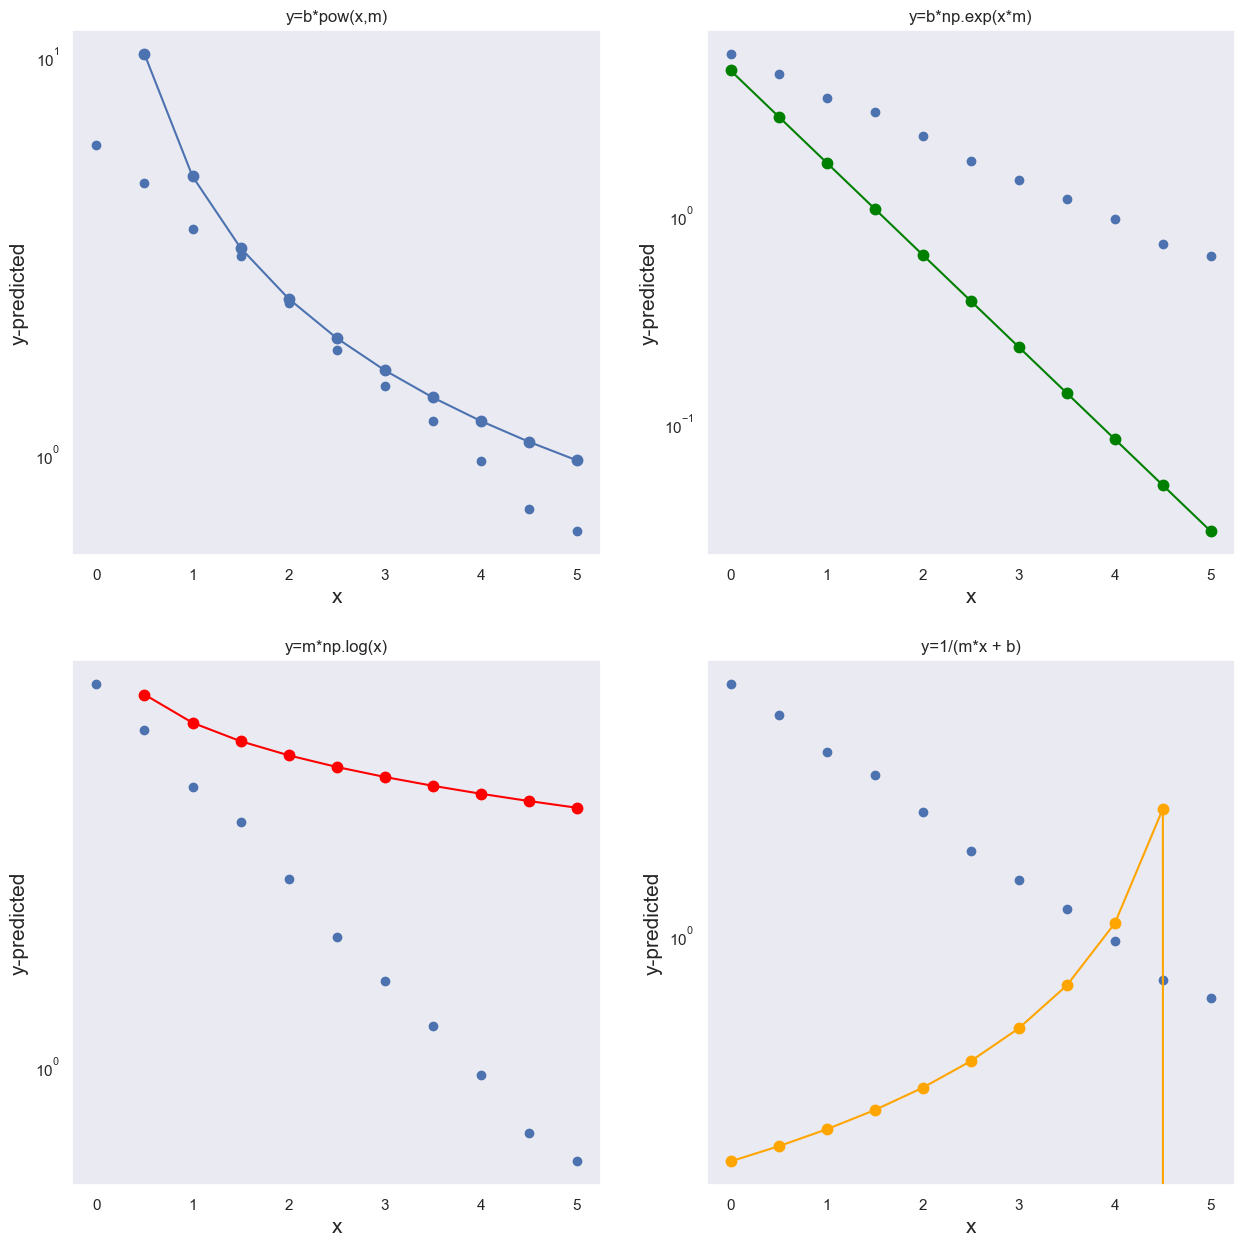

In [161]:
y =y_1
# plt.semilogx(x,y, marker='.', markersize=15, color='green')
fig_1, axs = plt.subplots(2, 2)
# plt.rcParams['figure.figsize'] = [15, 15]
axs[0, 0].semilogy(x_2,Y[1], marker='.', markersize=15)
axs[0, 0].scatter(df['x'], df['y'])
axs[0, 0].set_title('y=b*pow(x,m)')

axs[0, 1].semilogy(x_2,Y[2], marker='.', markersize=15, color='green')
axs[0, 1].set_title('y=b*np.exp(x*m)')
axs[0,1].scatter(df['x'], df['y'])

axs[1, 0].semilogy(x_2,Y[3], marker='.', markersize=15, color='red')
axs[1, 0].set_title('y=m*np.log(x)')
axs[1,0].scatter(df['x'], df['y'])

axs[1, 1].semilogy(x_2,Y[4], marker='.', markersize=15, color='orange')
axs[1, 1].set_title('y=1/(m*x + b)')
axs[1,1].scatter(df['x'], df['y'])

for ax in axs.flat:
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y-predicted', fontsize=15)
    ax.grid()


<h2>loglog

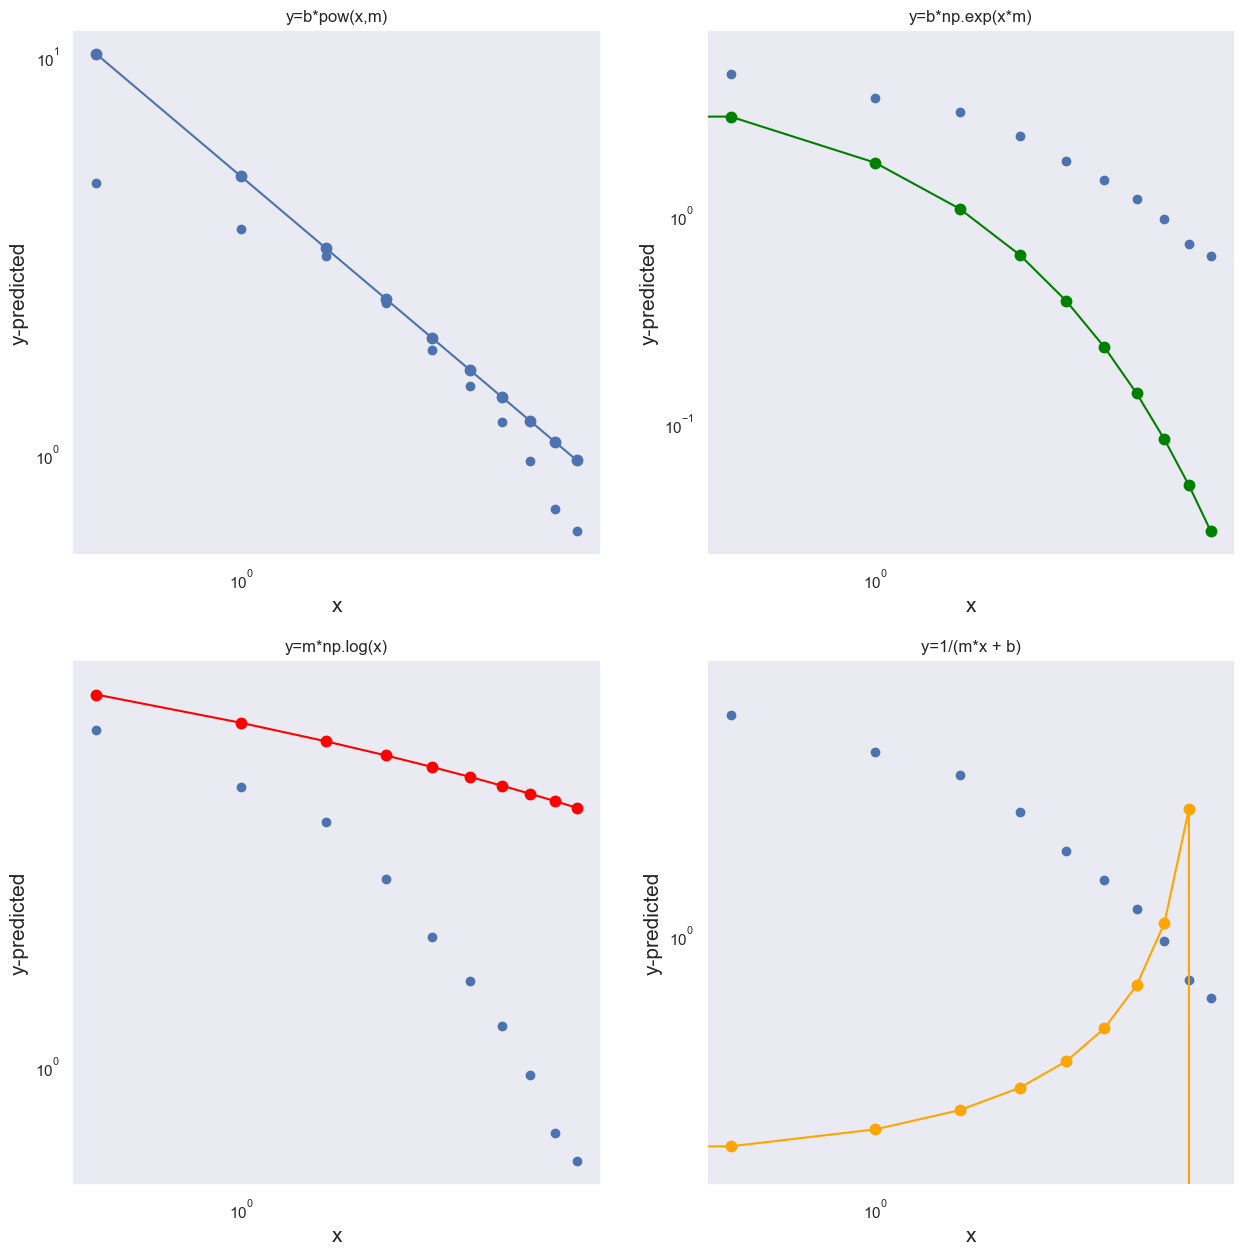

In [162]:
y =y_1
# plt.semilogx(x,y, marker='.', markersize=15, color='green')
fig_1, axs = plt.subplots(2, 2)
axs[0, 0].loglog(x_2,Y[1], marker='.', markersize=15)
axs[0, 0].scatter(df['x'], df['y'])
axs[0, 0].set_title('y=b*pow(x,m)')

axs[0, 1].loglog(x_2,Y[2], marker='.', markersize=15, color='green')
axs[0, 1].set_title('y=b*np.exp(x*m)')
axs[0,1].scatter(df['x'], df['y'])

axs[1, 0].loglog(x_2,Y[3], marker='.', markersize=15, color='red')
axs[1, 0].set_title('y=m*np.log(x)')
axs[1,0].scatter(df['x'], df['y'])

axs[1, 1].loglog(x_2,Y[4], marker='.', markersize=15, color='orange')
axs[1, 1].set_title('y=1/(m*x + b)')
axs[1,1].scatter(df['x'], df['y'])

for ax in axs.flat:
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y-predicted', fontsize=15)
    ax.grid()


In [163]:
plt.rcParams['figure.figsize'] = [5, 5]

<h1>Question 3

In [164]:
df_3 = {'x': [0.5, 2.4, 3.2, 4.9, 6.5, 7.8], 'y': [0.8, 9.3, 37.9, 68.2, 155.0, 198.0]}
df_3 = pd.DataFrame(data=df_3)
x_3 = df_3['x'].to_numpy()
y_3 = df_3['y'].to_numpy()

In [165]:
plt.rcParams['figure.figsize'] = [8, 5]

In [166]:
x_dash = np.log(x_3)
y_dash = np.log(y_3)

In [167]:
def powerfit(x, y):     
    xm = np.mean(x)
    ym = np.mean(y)
    b1 = np.sum((x-xm)*(y-ym))/(np.sum((x-xm)**2))
    b0 = ym - b1*xm
    return (b1, b0)
b1, b0 = powerfit(x_dash, y_dash)
m = b1 #gradient
b = b0 #intercept
print('m: {}, b:{}'.format(b1, b0))


m: 2.049553636875363, b:1.022453728075393


In [168]:
b = pow(10,b)

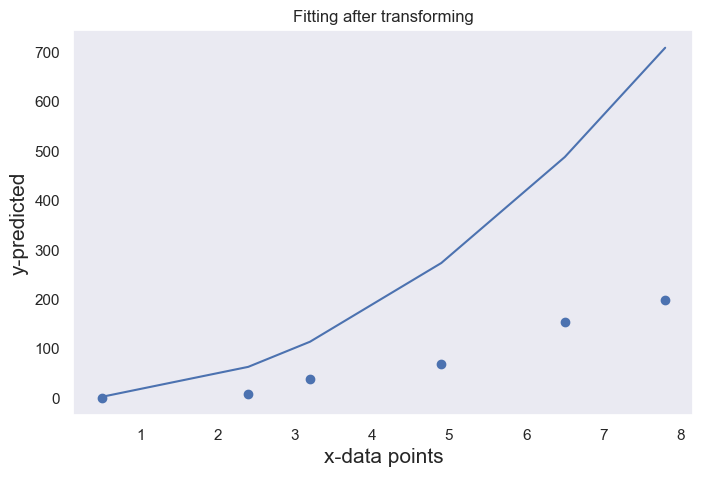

In [169]:
fig = plt.figure()
y_predicted = b*pow(x_3,m)
# print(y_3)
plt.scatter(df_3['x'], df_3['y'], label='Original Data')
plt.plot(x_3, y_predicted, label='y=b*x^m')
# plt.title('Graph of y=-1.022x+5.005 and Original Data Points', fontsize=15)
plt.xlabel('x-data points', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
# plt.legend(loc="upper right", prop={'size':13})
plt.title('Fitting after transforming')
plt.grid()
plt.show()

<h2>NOT TRANSFORMING

In [170]:
def powerfit(x, y):     
    xm = np.mean(x)
    ym = np.mean(y)
    b1 = np.sum((x-xm)*(y-ym))/(np.sum((x-xm)**2))
    b0 = ym - b1*xm
    return (b1, b0)
b1, b0 = powerfit(x_3, y_3)
m = b1 #gradient
b = b0 #intercept
print('m: {}, b:{}'.format(b1, b0))


m: 28.679241852643063, b:-42.73080314531158


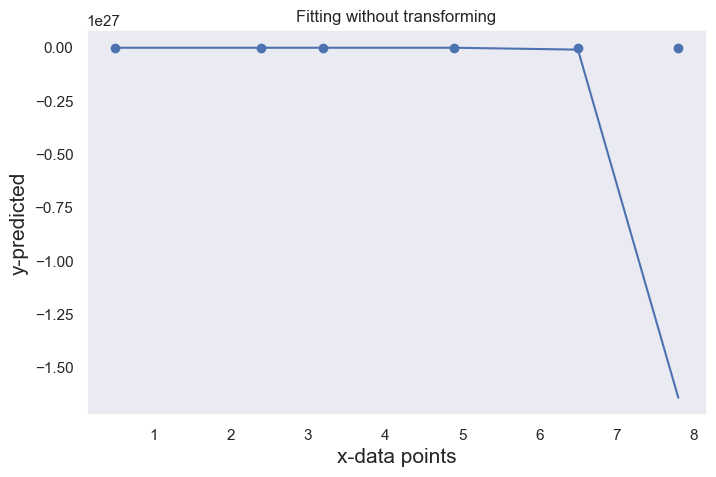

In [171]:
fig = plt.figure()
y_predicted = b*pow(x_3,m)
# print(y_3)
plt.scatter(df_3['x'], df_3['y'], label='Original Data')
plt.plot(x_3, y_predicted, label='y=b*x^m')
# plt.title('Graph of y=-1.022x+5.005 and Original Data Points', fontsize=15)
plt.xlabel('x-data points', fontsize=15)
plt.ylabel('y-predicted', fontsize=15)
# plt.legend(loc="upper right", prop={'size':13})
plt.title('Fitting without transforming')
plt.grid()
plt.show()

<h1>Question 4

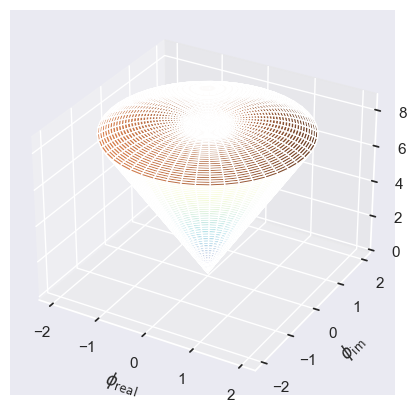

In [172]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# # # Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 2)
theta = np.linspace(0, 2*np.pi)

R, THETA = np.meshgrid(r, theta)
Z = 4*R
# Express the mesh in the cartesian system.
X = R*np.cos(THETA)
Y = R*np.sin(THETA)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# # #top of cone
theta_t = np.linspace(0,2*np.pi)
phi_t = np.linspace(0,np.pi/2)
# r_t = np.linspace(0,2)
PHI_t, THETA_t = np.meshgrid(phi_t, theta_t)
# PHI_t, _ = np.meshgrid(phi_t, theta_t)

# Make data.
X_t = R*np.cos(THETA_t)*np.sin(PHI_t)
Y_t = R*np.sin(THETA_t)*np.sin(PHI_t)
Z_t = 8+R*np.cos(PHI_t)

# Plot the surface.
surf = ax.plot_surface(X_t, Y_t, Z_t)

# ax.view_init(25, 20)

# Tweak the limits and add latex math labels.
# ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

<h1>Exploratory Analysis on Real-World Data

<h2>Question 2 - Part 1

<h4>Load the dataset using pandas and display all necessary information contained in the file

In [173]:
pd.set_option('display.max_rows', None)

In [174]:
dframe = pd.read_csv("/Users/farjad.ahmed/Documents/Studies/ML Lab/Exercise_01/task1.txt")

In [175]:
dframe.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [176]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99260 entries, 0 to 99259
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               99260 non-null  int64  
 1   Month              99260 non-null  int64  
 2   DayofMonth         99260 non-null  int64  
 3   DayOfWeek          99260 non-null  int64  
 4   DepTime            97847 non-null  float64
 5   CRSDepTime         99260 non-null  int64  
 6   ArrTime            97693 non-null  float64
 7   CRSArrTime         99260 non-null  int64  
 8   UniqueCarrier      99260 non-null  object 
 9   FlightNum          99260 non-null  int64  
 10  TailNum            98156 non-null  object 
 11  ActualElapsedTime  97659 non-null  float64
 12  CRSElapsedTime     99249 non-null  float64
 13  AirTime            97659 non-null  float64
 14  ArrDelay           97659 non-null  float64
 15  DepDelay           97847 non-null  float64
 16  Origin             992

In [177]:
dframe.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,3.0,18.0,0,NaN,0,339.0,0.0,0.0,0.0,0.0
1,2008,1,1,2,555.0,600,826.0,835,AA,1614,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,1,2,600.0,600,728.0,729,YV,2883,...,7.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,1,2,601.0,605,727.0,750,9E,5743,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,1,2,601.0,600,654.0,700,AA,1157,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,1,2,636.0,645,934.0,932,NW,1674,...,11.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,1,2,646.0,655,735.0,750,CO,340,...,6.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,1,2,650.0,700,841.0,857,XE,541,...,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,1,2,650.0,650,1139.0,1145,AA,1182,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,1,2,654.0,700,1117.0,1133,B6,1060,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


<h2>Question 2 - part 2

<h4>You are tasked as a data scientist to create a story that is visually appealing from this data. Create
plots using matplotlib/seaborn that will depict such interesting stories from flights that depart
from and arrive in the Austin region. The figures should be annotated properly and also easily
understandable on the first glance. A list of questions that can be explored/answered as reference are
given below. Of course, you are free to explore any other possibilities.

<h4>Investigate what time of the day it is best to fly so as to have the least possible delays. Does this
change with airlines?

In [178]:
#Adding a column that holds total delays in a journey except the arrival delay, this is added to the dframe1 as 'total_delays'
dframe1 = dframe
# dframe1['total_delays'] = dframe1['DepDelay'] + dframe1['CarrierDelay'] + dframe1['WeatherDelay'] + dframe1['NASDelay'] + dframe1['SecurityDelay'] + dframe1['LateAircraftDelay']
# # dframe1 = dframe1[dframe1.total_delays.notnull()]
# dframe1 = dframe1.dropna(subset=['CRSDepTime'])

In [179]:
dframe1['avg_delays'] = dframe1[['DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean(axis=1)
# dframe1.head(50)

In [180]:
#Converting single digit hour values in CRSDepTime to hhmm by padding a 0 at the beginning
dframe1['CRSDepTime'] = dframe1['CRSDepTime'].astype(int).astype(str)
dframe1['CRSDepTime'] = dframe1['CRSDepTime'].str.zfill(4)
#Splitting the column to obtain hh (hours) values from the dataframe which will be used to group by the data.
#Minutes are ignored, hence the values will be accurate to hourly time periods
dframe1['DT_Hours'] = dframe1['CRSDepTime'].str.slice(0,2)

In [181]:
result1 = dframe1.groupby('DT_Hours', as_index=False)['avg_delays'].min()
result1

,DT_Hours,avg_delays
0,00,-10.0
1,05,-15.0
2,06,-17.0
3,07,-36.0
4,08,-29.0
5,09,-17.0
6,10,-23.0
7,11,-22.0
8,12,-18.0
9,13,-20.0


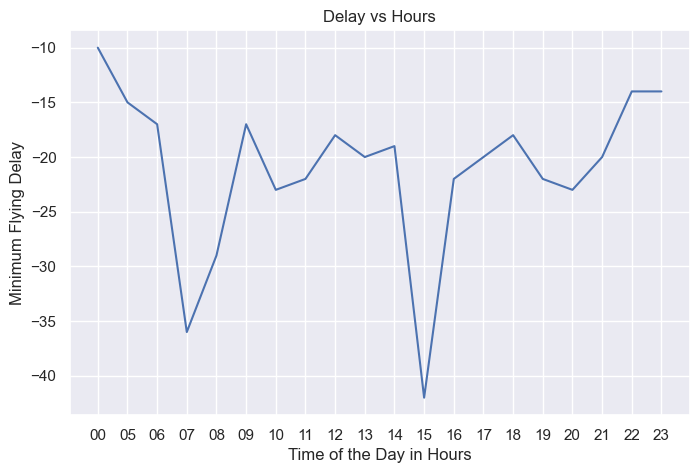

In [182]:
ax = sns.lineplot(result1, x=result1['DT_Hours'], y=result1['avg_delays'])
ax.set(xlabel='Time of the Day in Hours', ylabel='Minimum Flying Delay', title='Delay vs Hours')
plt.show()

<h3>Investigating wether the flying  delays vary with airlines

In [183]:
result2 = dframe1.groupby(['DT_Hours', 'UniqueCarrier'], as_index=False)['avg_delays'].min()
# result2

In [184]:
# #Tried doing this with sql for exploring purposes, hence some are done with pandas functions some with sql
# query = "Select DT_Hours, UniqueCarrier, min(avg_delays) as min_delays from dframe1 group by DT_Hours, UniqueCarrier"
# dframe2 = sqldf(query, globals())
# dframe2.head(50)

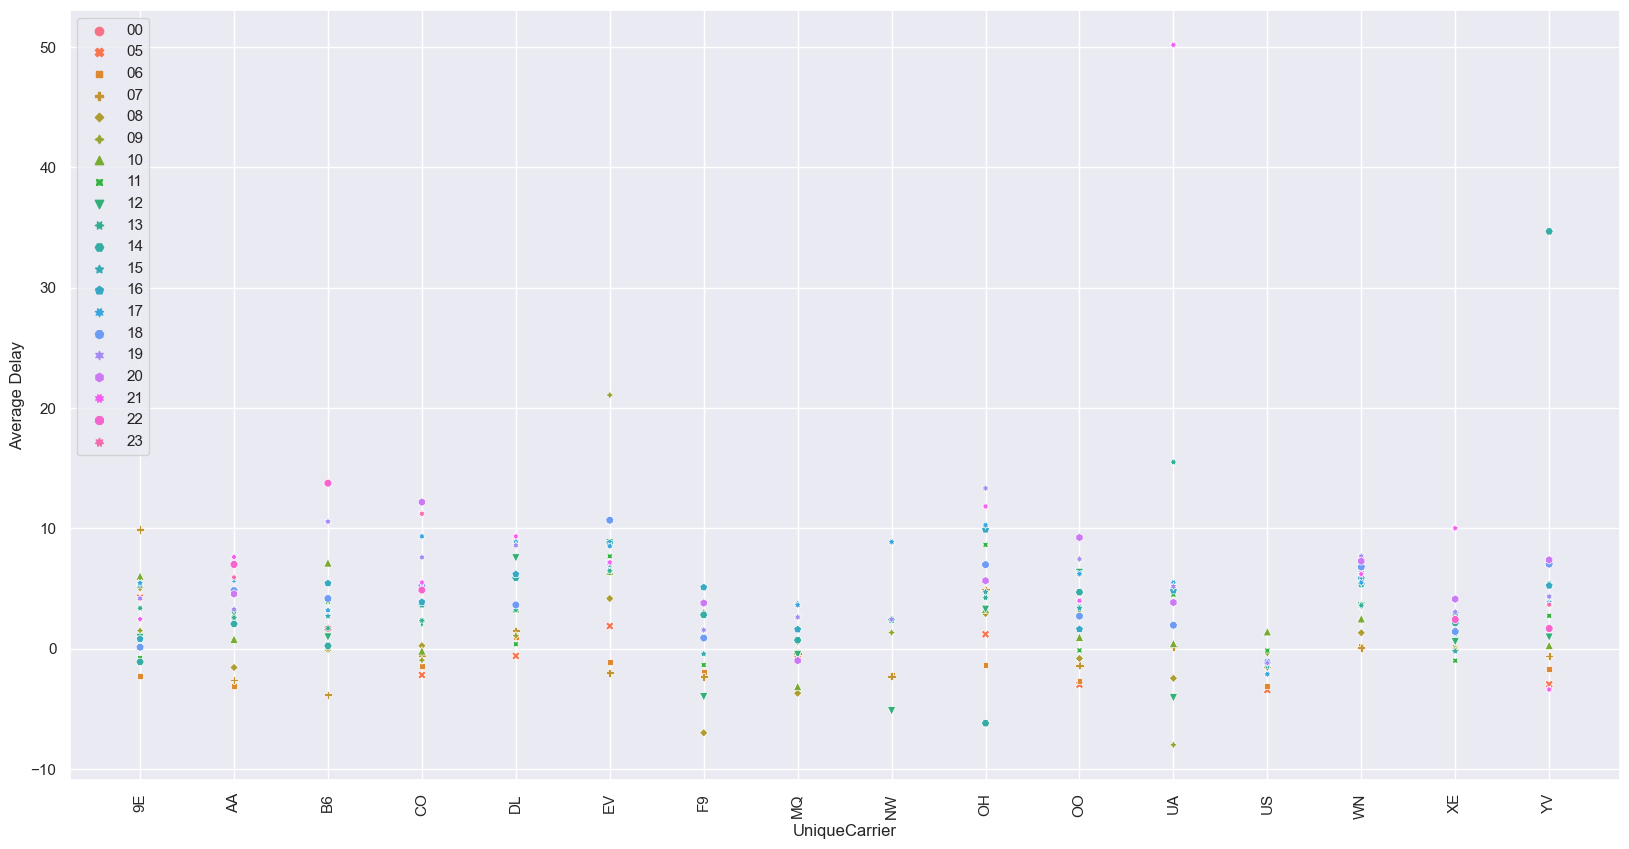

In [185]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(dframe1.groupby([dframe1['UniqueCarrier'], 'DT_Hours'])['avg_delays'].mean().unstack(), linewidth=0.5,ax=ax)

plt.xlabel('UniqueCarrier')
plt.ylabel('Average Delay')
plt.xticks(rotation=450)
plt.legend()
plt.show()

In [186]:
q = "Select DT_Hours, UniqueCarrier, min(avg_delays) as least_delays from result2 group by DT_Hours"
df_day = sqldf(q, globals())
df_day

,DT_Hours,UniqueCarrier,least_delays
0,00,B6,-10.0
1,05,YV,-15.0
2,06,YV,-17.0
3,07,YV,-36.0
4,08,YV,-29.0
5,09,CO,-17.0
6,10,MQ,-23.0
7,11,YV,-22.0
8,12,B6,-18.0
9,13,B6,-20.0


<h3> Better graphical representation of best time of flying with minimum delays along with the carrier

[Text(0.5, 1.0, 'Best flying time and the Flight Carrier')]

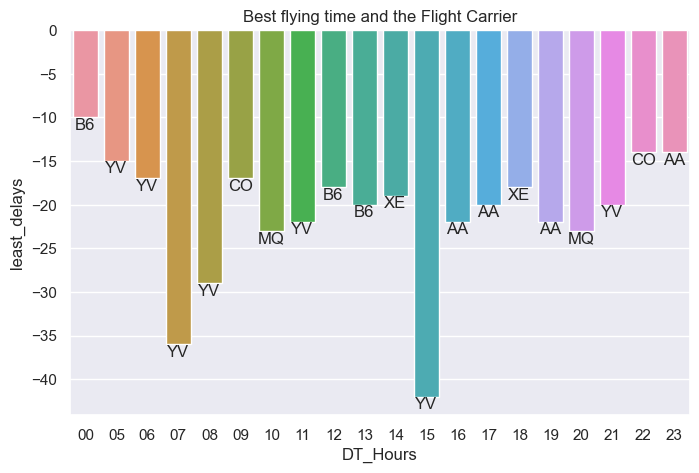

In [187]:
#Bar chart representation of the best time to fly on a given day, w.r.t the flight carrier
ax = sns.barplot(data=df_day, x=df_day['DT_Hours'], y=df_day['least_delays'], ci = None)
for container, number in zip(ax.containers, df_day.UniqueCarrier):
    ax.bar_label(container, labels=list(df_day['UniqueCarrier']))
ax.set(title='Best flying time and the Flight Carrier')

<h3>Investigate what time of the year it is more suited to fly so as to have the delays minimum and
does the destination affect this? You can lay insights on some popular destinations for the task.

<h4>Affects of time of the year

In [188]:
# q = "Select Month, Dest, min(avg_delays) as least_delays from dframe1 group by Month"
# result2 = sqldf(q, globals())
# result2.head(12)
result2 = dframe1.groupby('Month')['avg_delays'].min().reset_index(name='least_delays')
result2

,Month,least_delays
0,1,-29.0
1,2,-22.0
2,3,-22.0
3,4,-22.0
4,5,-36.0
5,6,-20.0
6,7,-42.0
7,8,-20.0
8,9,-20.0
9,10,-17.0


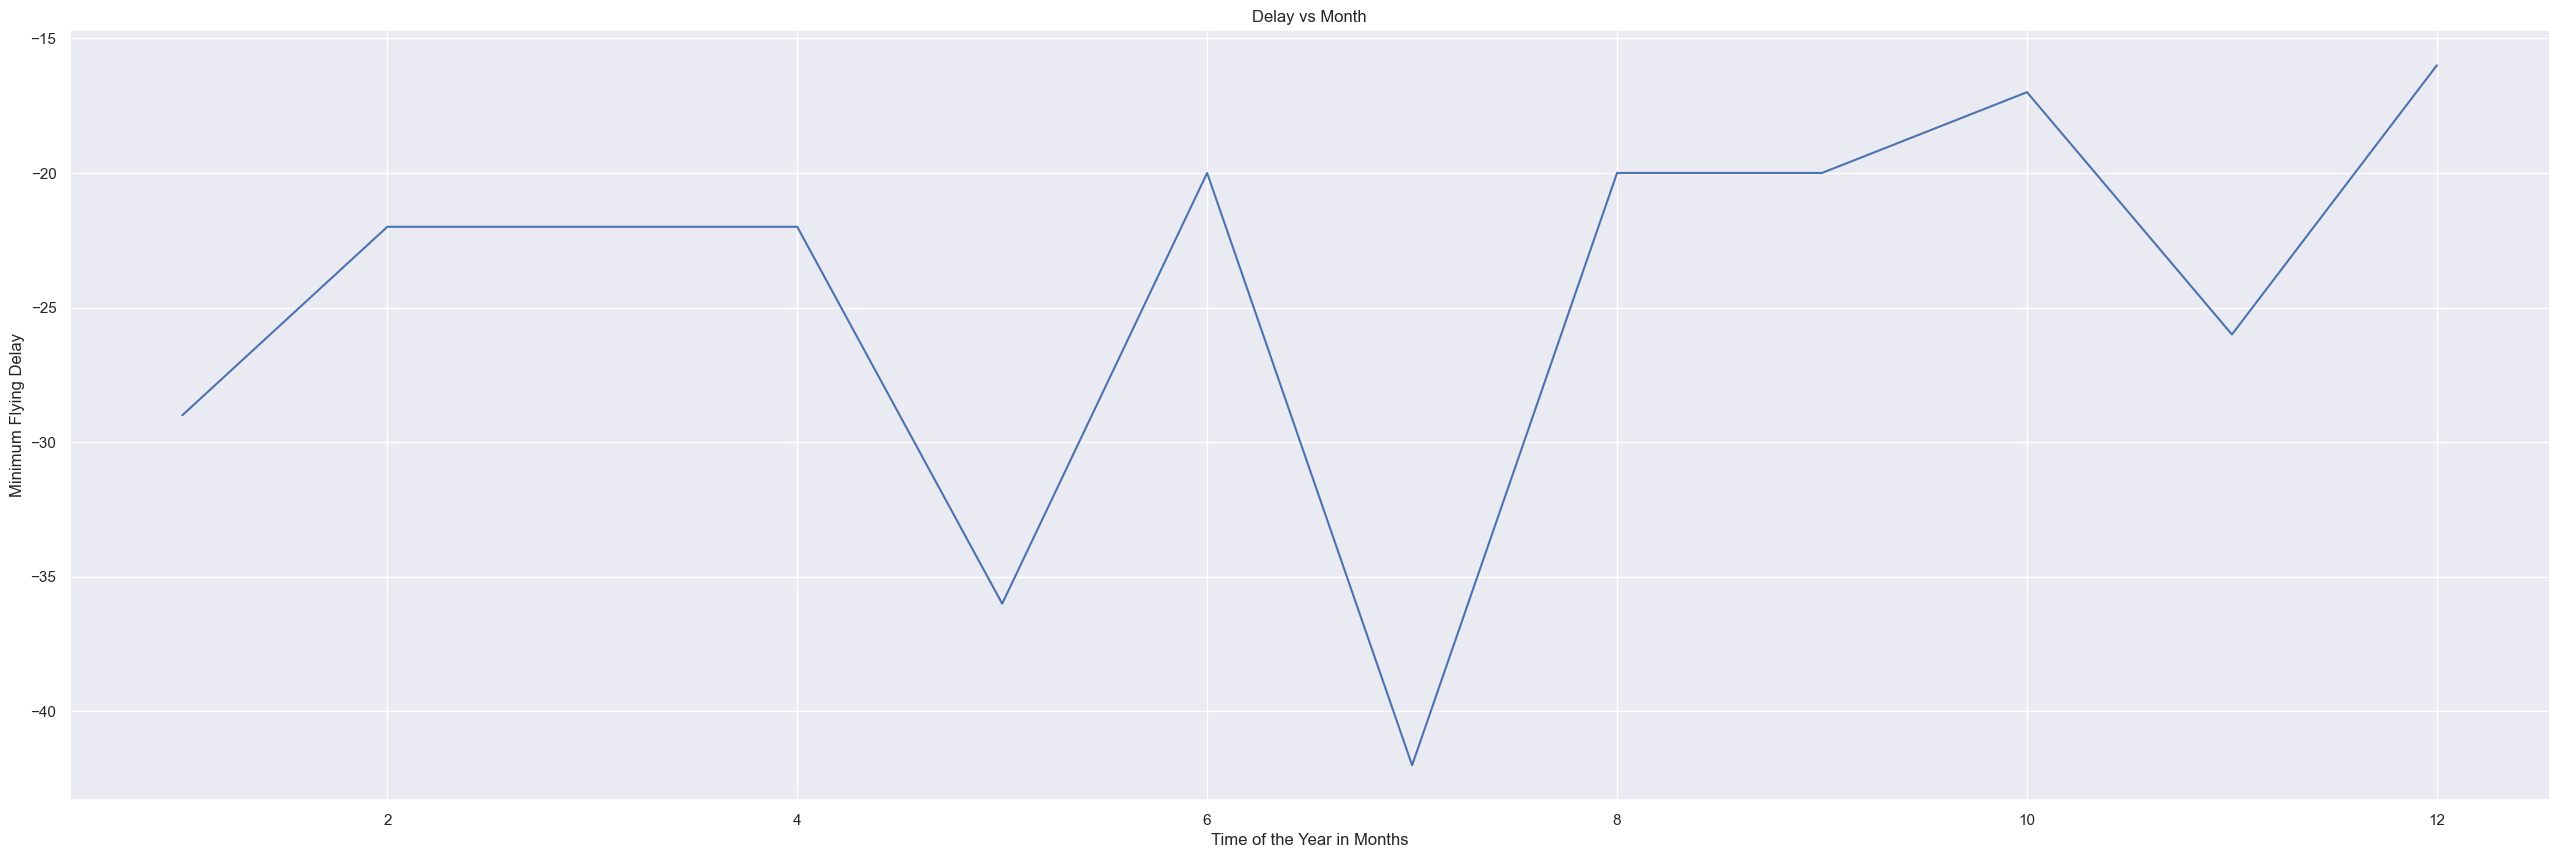

In [189]:
sns.set(rc={'figure.figsize':(32,10)})
ax1 = sns.lineplot(data=result2, x=result2['Month'], y=result2['least_delays'])
ax1.set(xlabel='Time of the Year in Months', ylabel='Minimum Flying Delay', title='Delay vs Month')
plt.show()

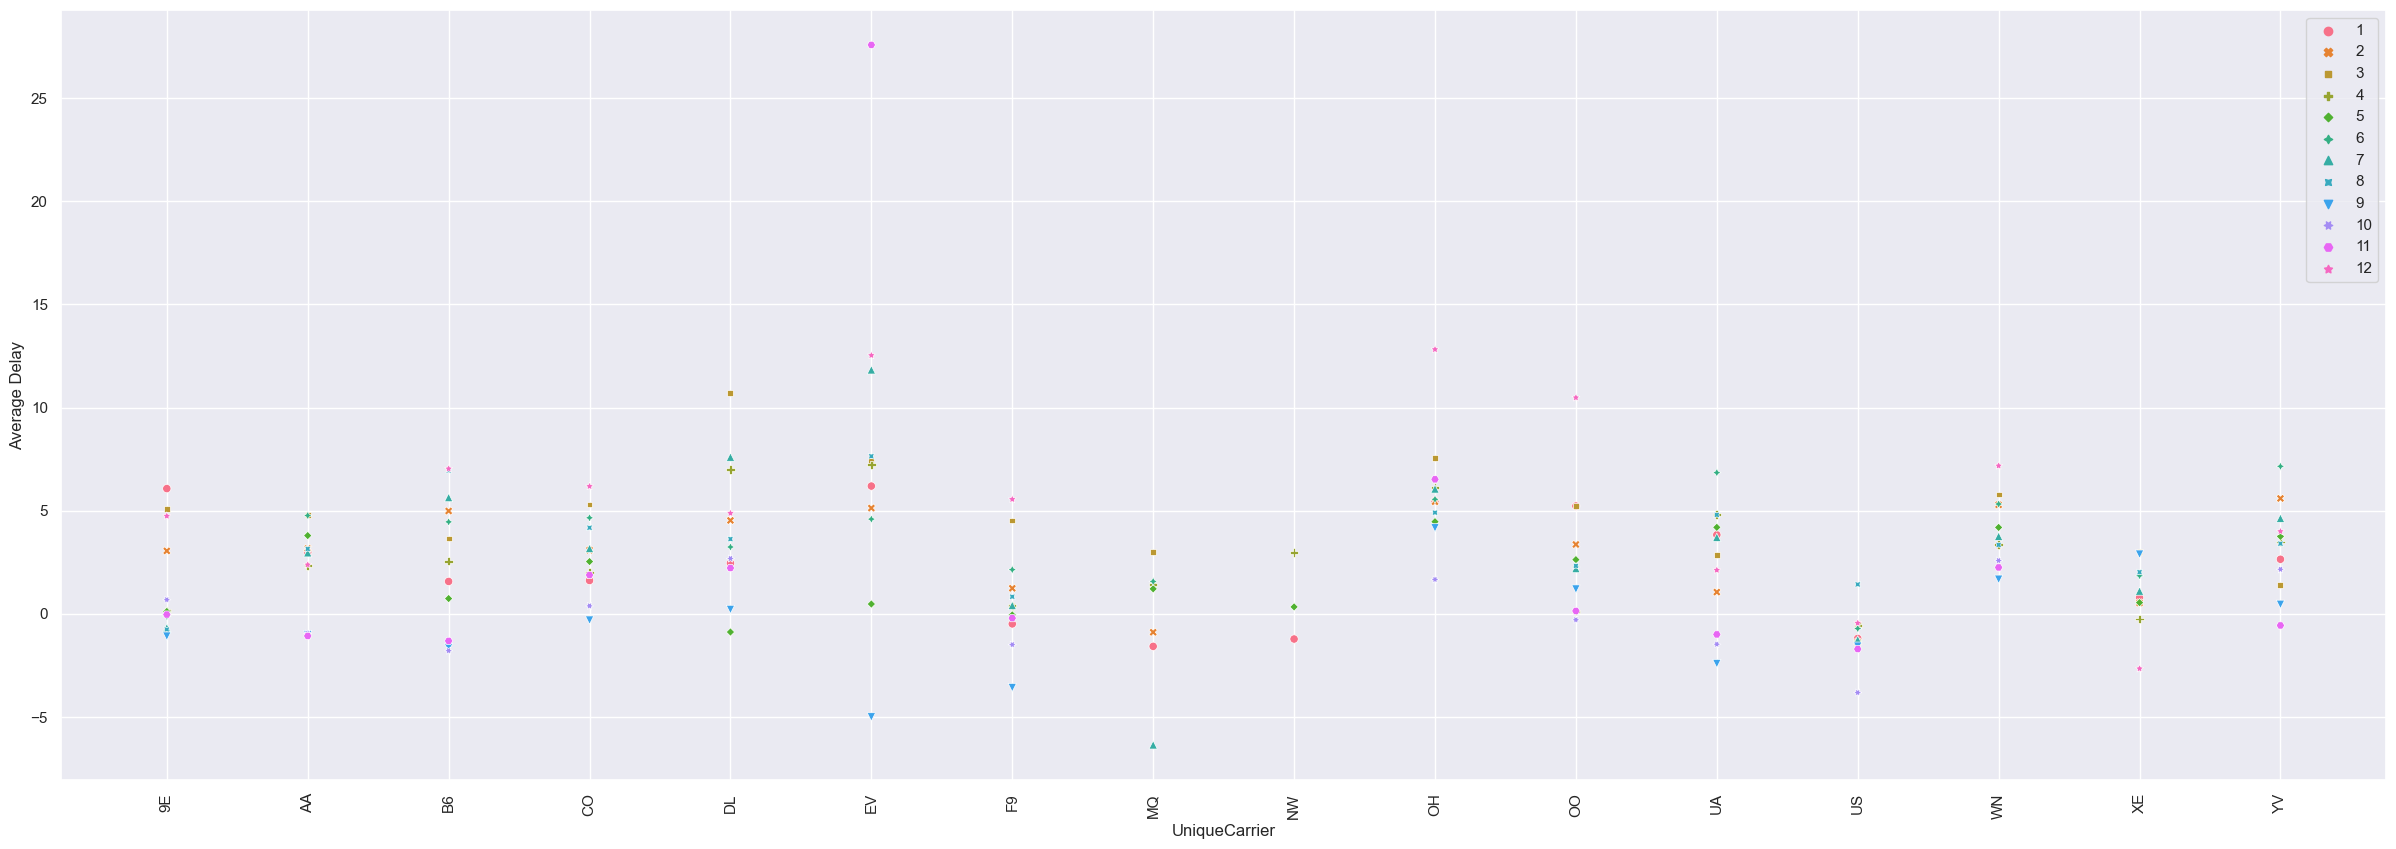

In [190]:
fig, ax = plt.subplots(figsize=(30, 10))
# fig = plt.figure()
sns.scatterplot(dframe1.groupby([dframe1['UniqueCarrier'], 'Month'])['avg_delays'].mean().unstack(), linewidth=0.5,ax=ax)

plt.xlabel('UniqueCarrier')
plt.ylabel('Average Delay')
plt.xticks(rotation=450)
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'get_bbox'

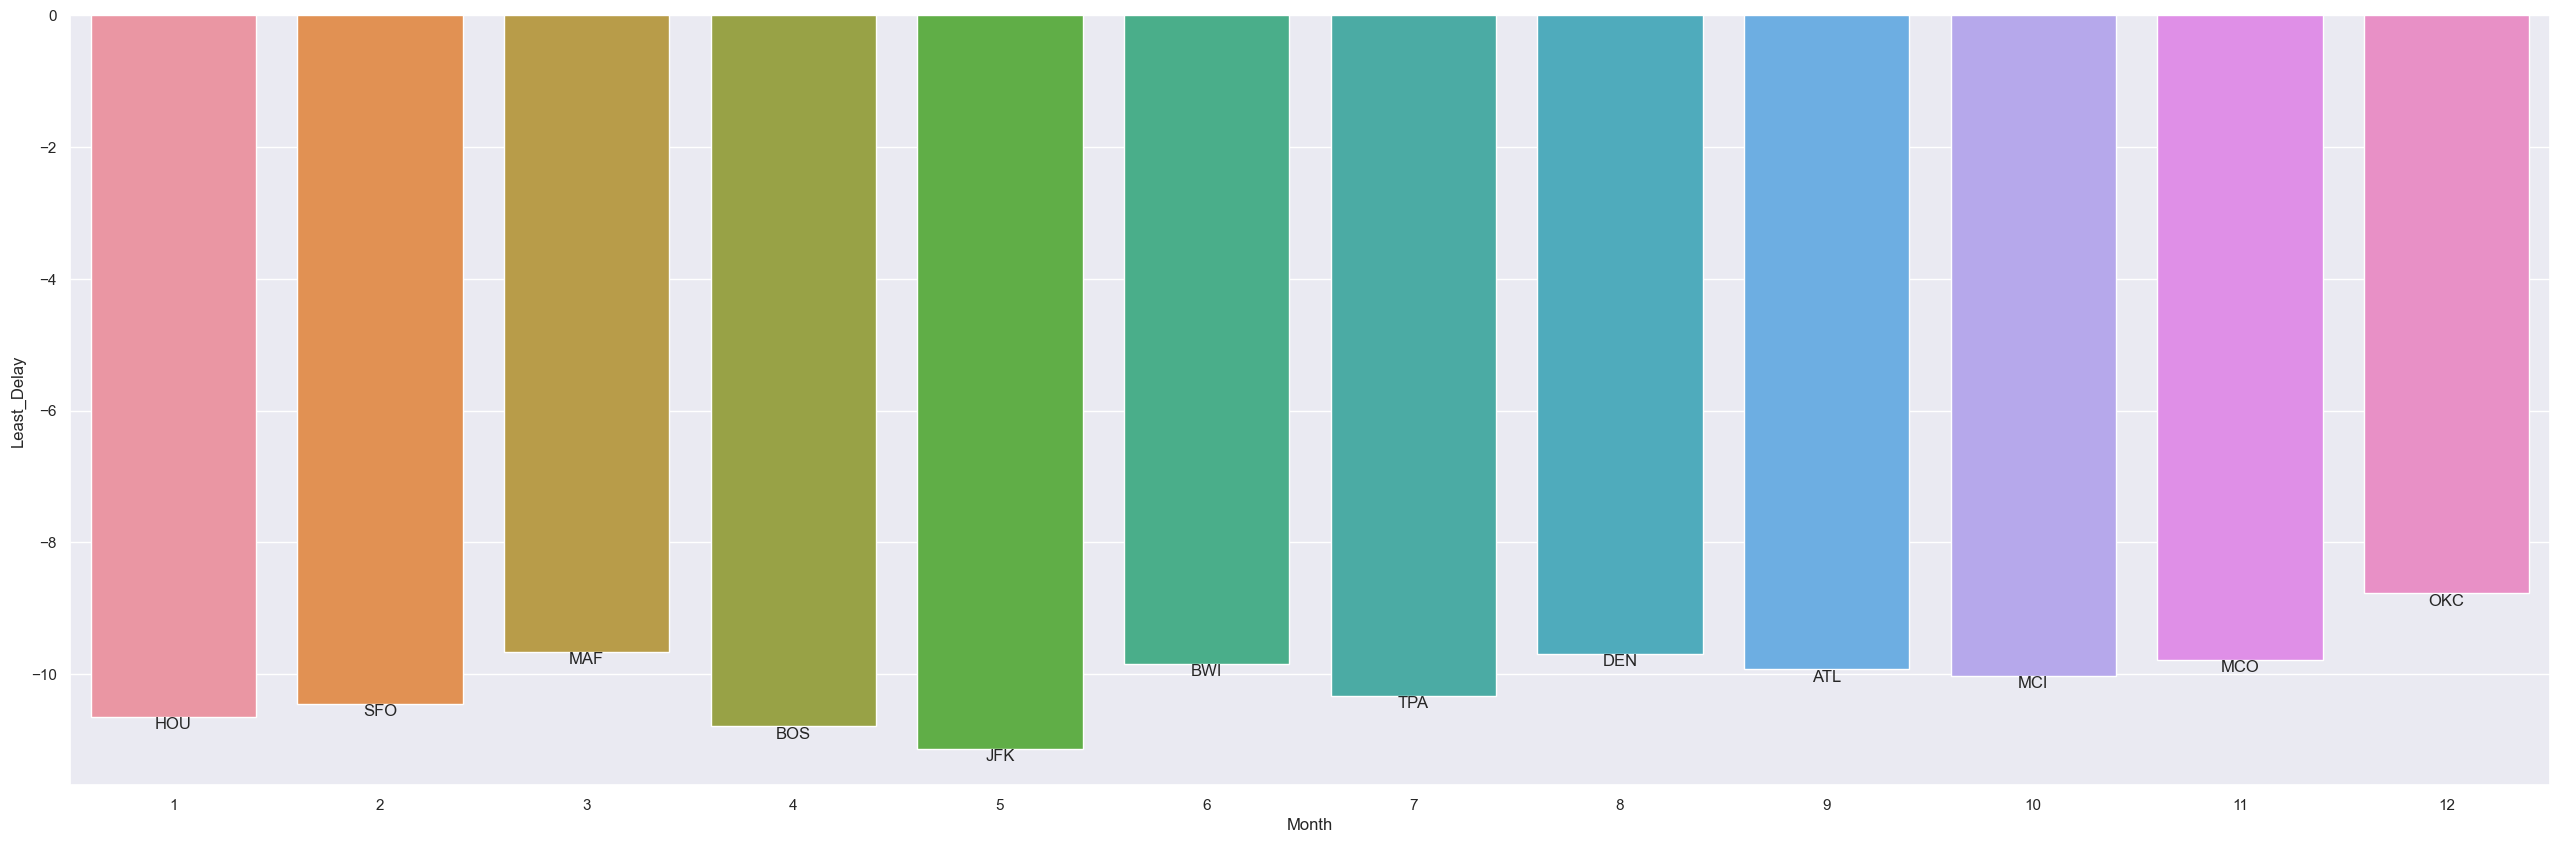

In [191]:
q = "Select Month, Dest, min(avg_delays) as Least_Delay from dframe1 group by Month, Dest"
mydf = sqldf(q, globals())
# mydf.heaed(10)
# ax = sns.barplot(data=mydf, x=mydf['Month'], y=mydf['Least_Delay'], ci = None)
# for container, number in zip(ax.containers, mydf.Dest):
#     ax.bar_label(container, labels = set(list(mydf.Dest)))
# ax.set(title='Time of the Year to Fly with Minimum Delay w.r.t Flight Carriers')
# plt.show()

#Bar chart representation of the best time to fly on a given day, w.r.t the flight carrier
ax = sns.barplot(data=mydf, x=mydf['Month'], y=mydf['Least_Delay'], ci = None)
for container, number in zip(ax.containers, mydf.Dest):
    ax.bar_label(container, labels=list(set(list(mydf['Dest']))))
ax.set(title='Best flying time and the Flight Carrier')

<h2>You can lay insights on some popular destinations for the task.

In [ ]:
#Finding the most popular destination
dframe1.groupby('Dest')['Dest'].count().sort_values(ascending=False).head(1)


Dest
AUS    49637
Name: Dest, dtype: int64

<h2>Explore some airports that are bad to fly to. Does the time of day or year affect this?

In [ ]:
dframe1.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,avg_delays,DT_Hours
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,0,NaN,0,339.0,0.0,0.0,0.0,0.0,114.0,19
1,2008,1,1,2,555.0,0600,826.0,835,AA,1614,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-5.0,06
2,2008,1,1,2,600.0,0600,728.0,729,YV,2883,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,06
3,2008,1,1,2,601.0,0605,727.0,750,9E,5743,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-4.0,06
4,2008,1,1,2,601.0,0600,654.0,700,AA,1157,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,06


In [ ]:
dframe1['avg_delayWithArrivalDelay'] = dframe1[['DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay']].mean(axis=1)
dframe1.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,avg_delays,DT_Hours,avg_delayWithArrivalDelay
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,NaN,0,339.0,0.0,0.0,0.0,0.0,114.0,19,146.142857
1,2008,1,1,2,555.0,0600,826.0,835,AA,1614,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-5.0,06,-7.000000
2,2008,1,1,2,600.0,0600,728.0,729,YV,2883,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,06,-0.500000
3,2008,1,1,2,601.0,0605,727.0,750,9E,5743,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-4.0,06,-13.500000
4,2008,1,1,2,601.0,0600,654.0,700,AA,1157,...,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,06,-2.500000
5,2008,1,1,2,636.0,0645,934.0,932,NW,1674,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-9.0,06,-3.500000
6,2008,1,1,2,646.0,0655,735.0,750,CO,340,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-9.0,06,-12.000000
7,2008,1,1,2,650.0,0700,841.0,857,XE,541,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-10.0,07,-13.000000
8,2008,1,1,2,650.0,0650,1139.0,1145,AA,1182,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,06,-3.000000
9,2008,1,1,2,654.0,0700,1117.0,1133,B6,1060,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-6.0,07,-11.000000


In [ ]:
df_day = dframe1.groupby(['Dest'])['avg_delayWithArrivalDelay'].max().reset_index(name='max_delays')
df_day.head(10) 

,Dest,max_delays
0,ABQ,118.000000
1,ATL,395.857143
2,AUS,220.714286
3,BNA,74.714286
4,BOS,187.428571
5,BWI,115.285714
6,CLE,157.571429
7,CLT,94.285714
8,CVG,157.142857
9,DAL,251.000000


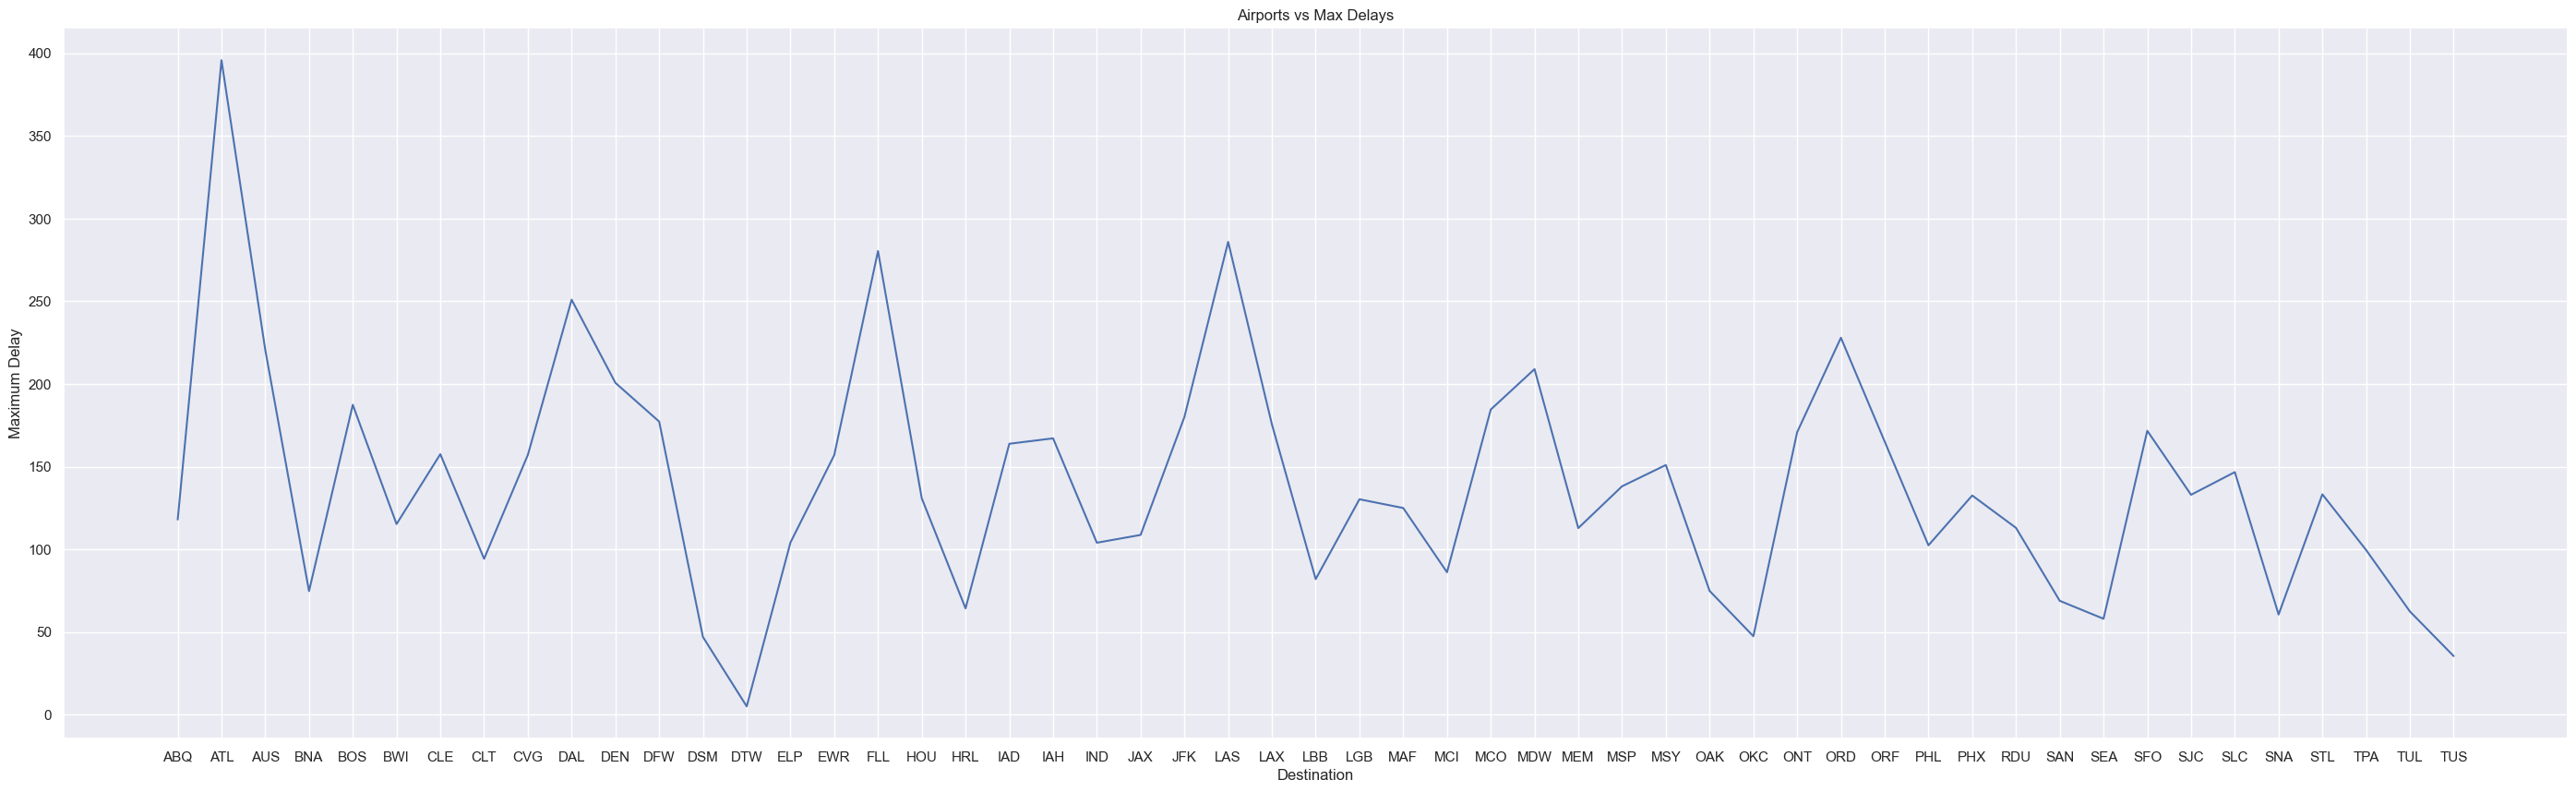

In [ ]:
sns.set(rc={'figure.figsize':(35,10)})
ax = sns.lineplot(x=df_day['Dest'], y=df_day['max_delays'], ci=None)
ax.set(xlabel='Destination', ylabel='Maximum Delay', title='Airports vs Max Delays')
# ax.set_xticks()
plt.show()

In [ ]:
# #Bar chart representation of the best time to fly on a given day, w.r.t the flight carrier
# sns.set(rc={'figure.figsize':(50,20)})
# ax = sns.barplot(data=df_day, x=df_day['Dest'], y=df_day['Least_Delay'], ci = None)
# for container, number in zip(ax.containers, df_day.Dest):
#     ax.bar_label(container)
# ax.set(title='Best flying time and the Flight Carrier')
# plt.show()

In [ ]:
dframe1.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,avg_delays,DT_Hours,avg_delayWithArrivalDelay
0,2008,1,1,2,120.0,1935,309.0,2130,9E,5746,...,NaN,0,339.0,0.0,0.0,0.0,0.0,114.0,19,146.142857
1,2008,1,1,2,555.0,0600,826.0,835,AA,1614,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-5.0,06,-7.000000
2,2008,1,1,2,600.0,0600,728.0,729,YV,2883,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,06,-0.500000
3,2008,1,1,2,601.0,0605,727.0,750,9E,5743,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-4.0,06,-13.500000
4,2008,1,1,2,601.0,0600,654.0,700,AA,1157,...,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,06,-2.500000
5,2008,1,1,2,636.0,0645,934.0,932,NW,1674,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-9.0,06,-3.500000
6,2008,1,1,2,646.0,0655,735.0,750,CO,340,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-9.0,06,-12.000000
7,2008,1,1,2,650.0,0700,841.0,857,XE,541,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-10.0,07,-13.000000
8,2008,1,1,2,650.0,0650,1139.0,1145,AA,1182,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,06,-3.000000
9,2008,1,1,2,654.0,0700,1117.0,1133,B6,1060,...,NaN,0,NaN,NaN,NaN,NaN,NaN,-6.0,07,-11.000000


In [ ]:
#Time of the day affects
df_day = dframe1.groupby(['Dest', 'DT_Hours'], as_index=False)['avg_delayWithArrivalDelay'].max().sort_values(by='avg_delayWithArrivalDelay', ascending=False)
df_day.rename(columns = {'avg_delayWithArrivalDelay':'max_delays'}, inplace = True)
df_day.head(10)

,Dest,DT_Hours,max_delays
4,ATL,05,395.857143
208,LAS,19,286.000000
144,FLL,14,280.428571
77,DAL,09,251.000000
289,ORD,17,228.000000
23,AUS,12,220.714286
29,AUS,18,213.000000
27,AUS,16,209.428571
253,MDW,16,209.000000
31,AUS,20,202.142857


In [ ]:
d = list(set(list(df_day.Dest)))

AttributeError: 'NoneType' object has no attribute 'get_bbox'

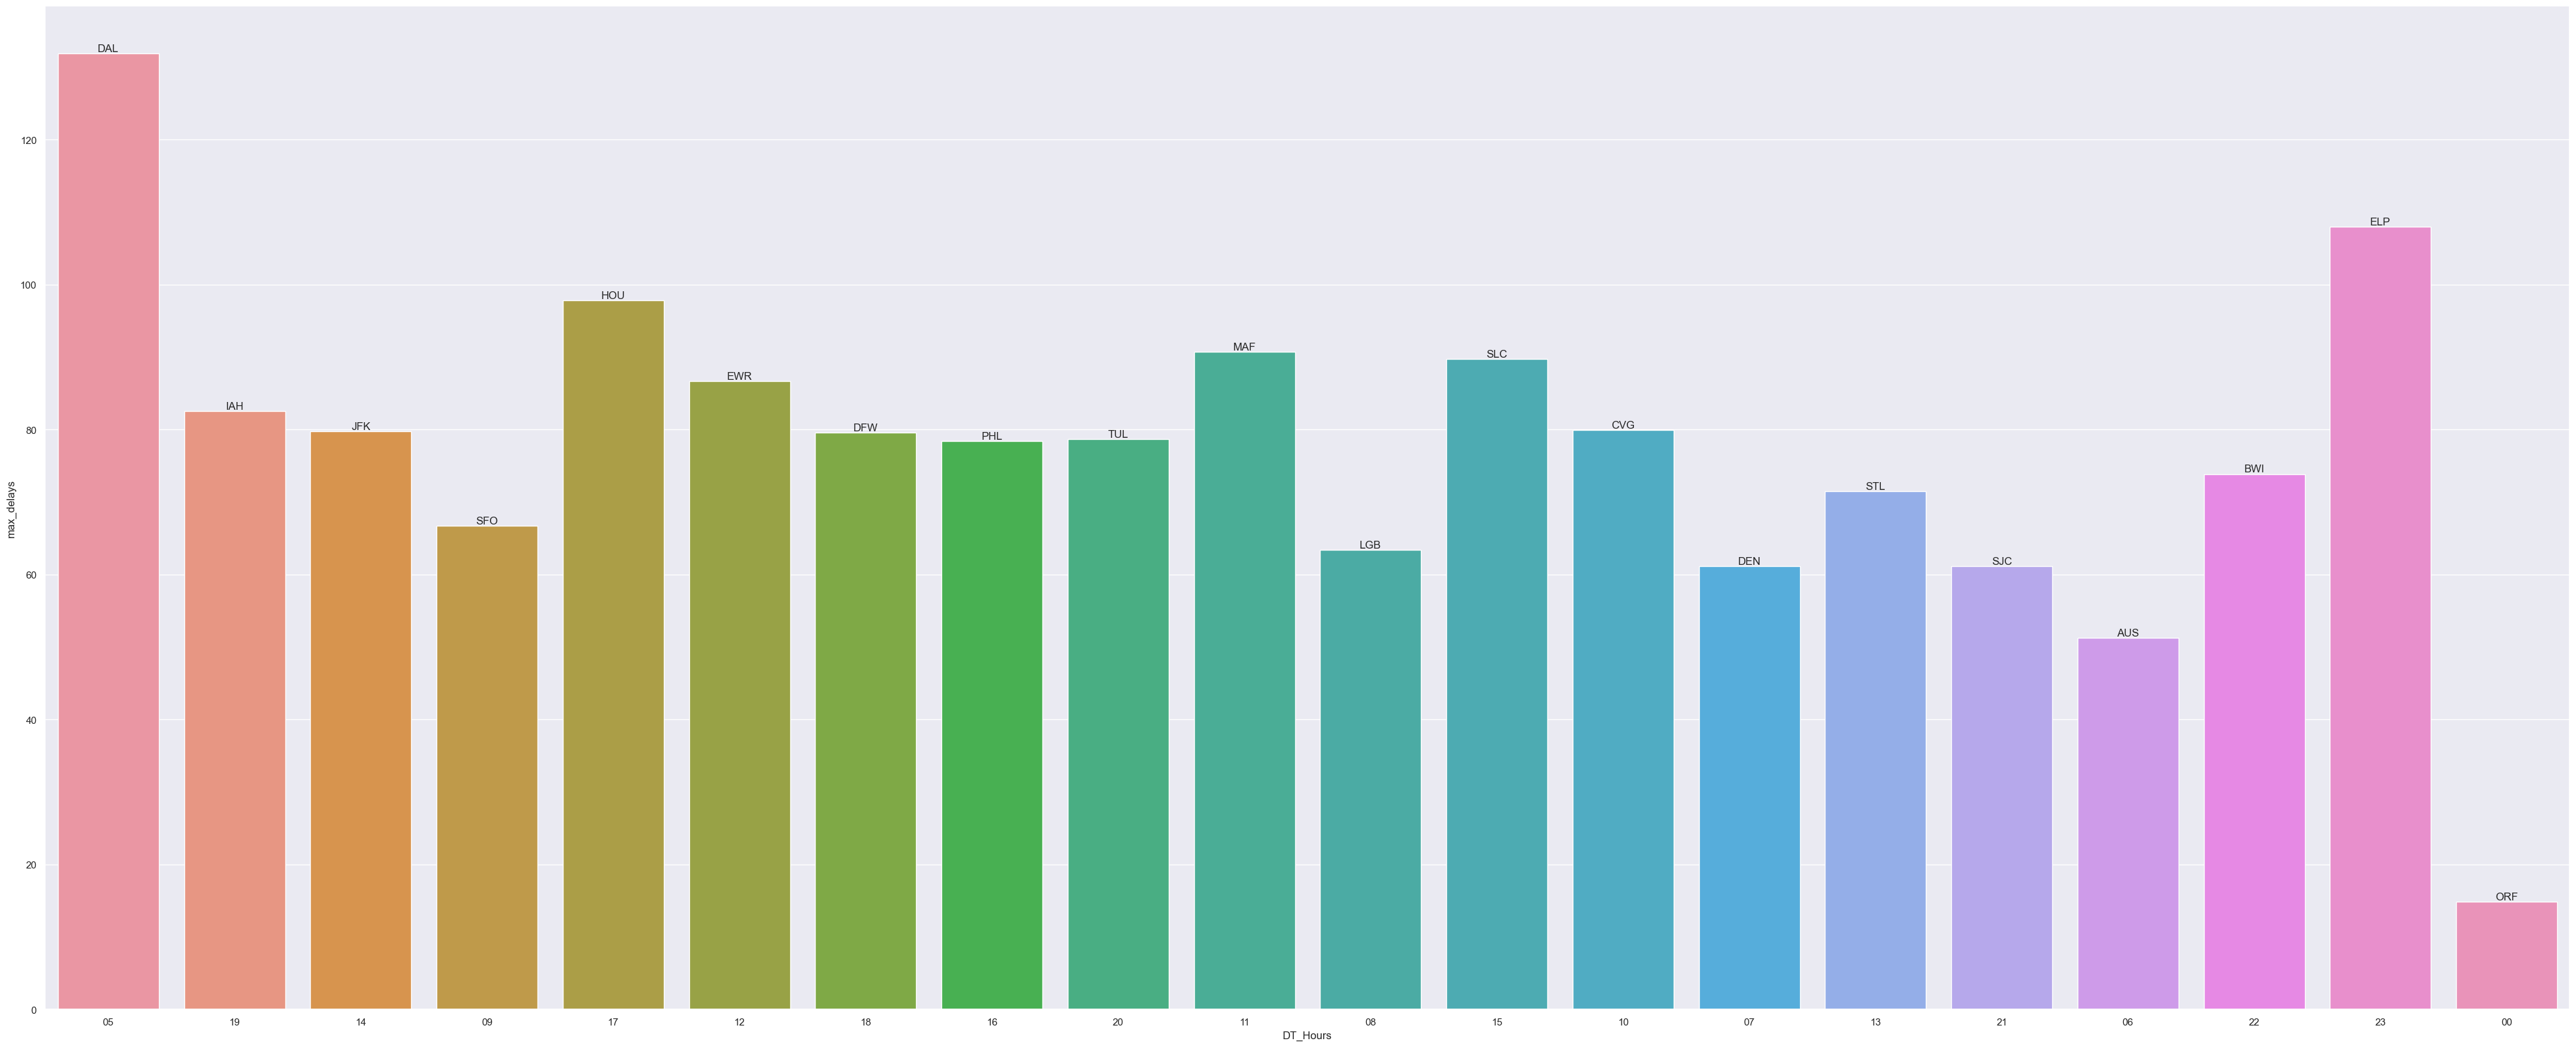

In [ ]:
#Bar chart representation of the best time to fly on a given day, w.r.t the flight carrier
var = list(set(list(df_day.Dest)))
sns.set(rc={'figure.figsize':(50,20)})
ax = sns.barplot(data=df_day, x=df_day['DT_Hours'], y=df_day['max_delays'], ci = None)
for container, number in zip(ax.containers, df_day.Dest):
    ax.bar_label(container, labels=d)
ax.set(title='Worst Airports to Fly w.r.t Months')
plt.show()

In [ ]:
#Time of the year affects
df_month = dframe1.groupby(['Dest', 'Month'], as_index=False)['avg_delayWithArrivalDelay'].max().sort_values(by='avg_delayWithArrivalDelay', ascending=False)
df_month.rename(columns = {'avg_delayWithArrivalDelay':'max_delays'}, inplace = True)
df_month.head(10)

,Dest,Month,max_delays
20,ATL,12,395.857143
244,LAS,2,286.000000
162,FLL,7,280.428571
100,DAL,3,251.000000
380,ORD,8,228.000000
27,AUS,7,220.714286
30,AUS,10,213.000000
28,AUS,8,209.428571
319,MDW,2,209.000000
32,AUS,12,202.142857


In [ ]:
d = list(set(list(df_month.Dest)))

AttributeError: 'NoneType' object has no attribute 'get_bbox'

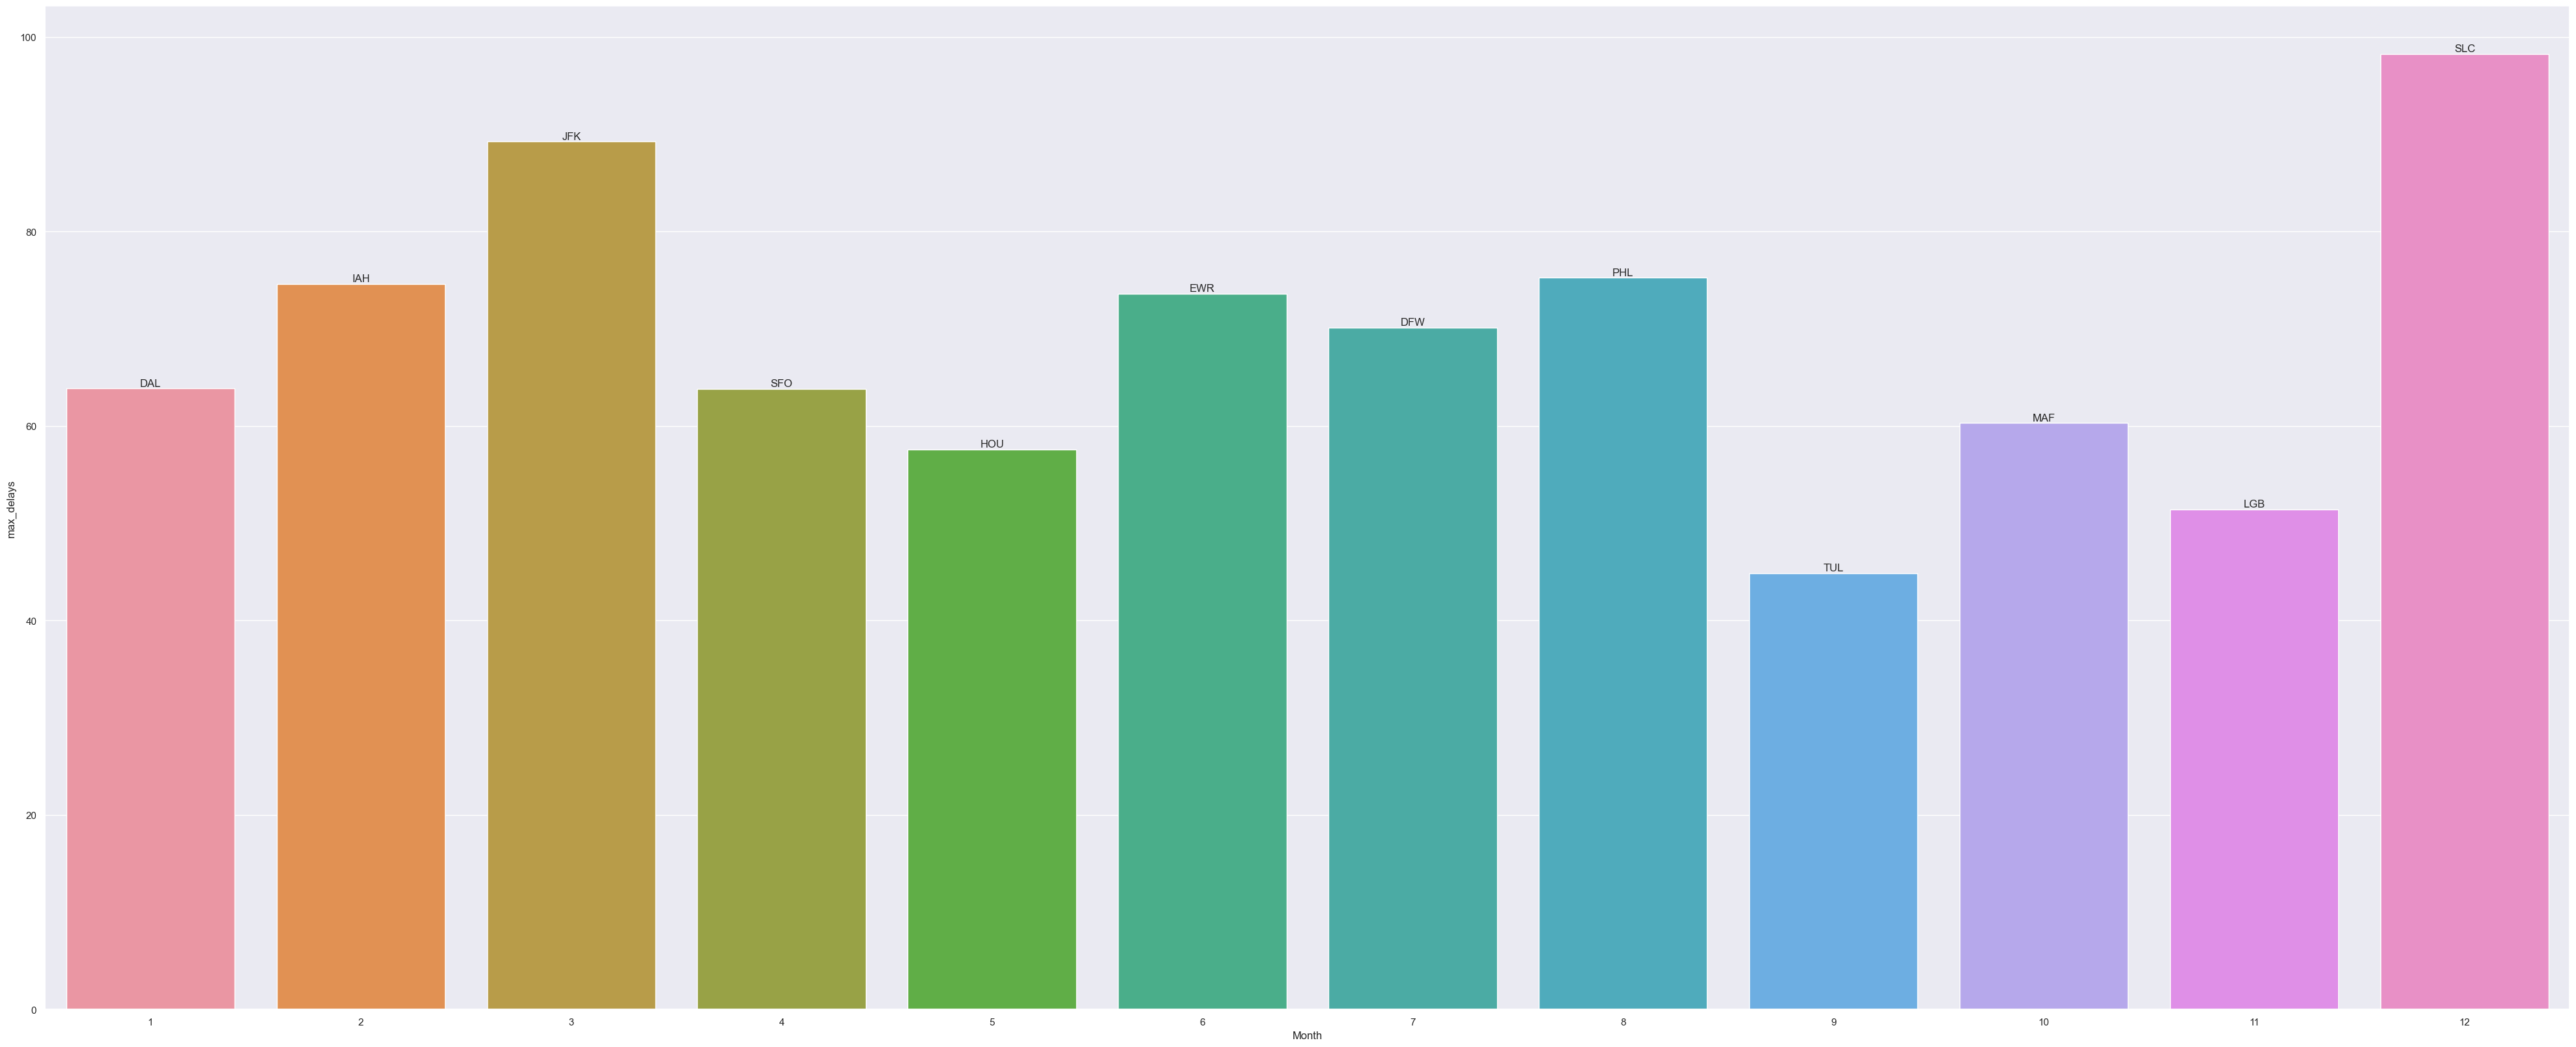

In [ ]:
#Bar chart representation of the best time to fly on a given day, w.r.t the flight carrier
var = list(set(list(df_month.Dest)))
sns.set(rc={'figure.figsize':(50,20)})
ax = sns.barplot(data=df_day, x=df_month['Month'], y=df_month['max_delays'], ci = None)
for container, number in zip(ax.containers, df_month.Dest):
    ax.bar_label(container, labels=d)
ax.set(title='Worst Airports to Fly w.r.t Months')
plt.show()

<h4>Investigate on how the pattern of flights to various destinations alter over the course of year.

In [ ]:
#Pattern of flights over the course of a year along with Flight
result1 = dframe1.groupby(['Month', 'Dest', 'FlightNum'])['FlightNum'].count().reset_index(name='CountOfFlights')
result1.head(10)

,Month,Dest,FlightNum,CountOfFlights
0,1,ABQ,311,31
1,1,ABQ,315,27
2,1,ATL,466,2
3,1,ATL,470,2
4,1,ATL,1254,1
5,1,ATL,1535,11
6,1,ATL,1590,30
7,1,ATL,3906,2
8,1,ATL,4325,25
9,1,ATL,4338,31


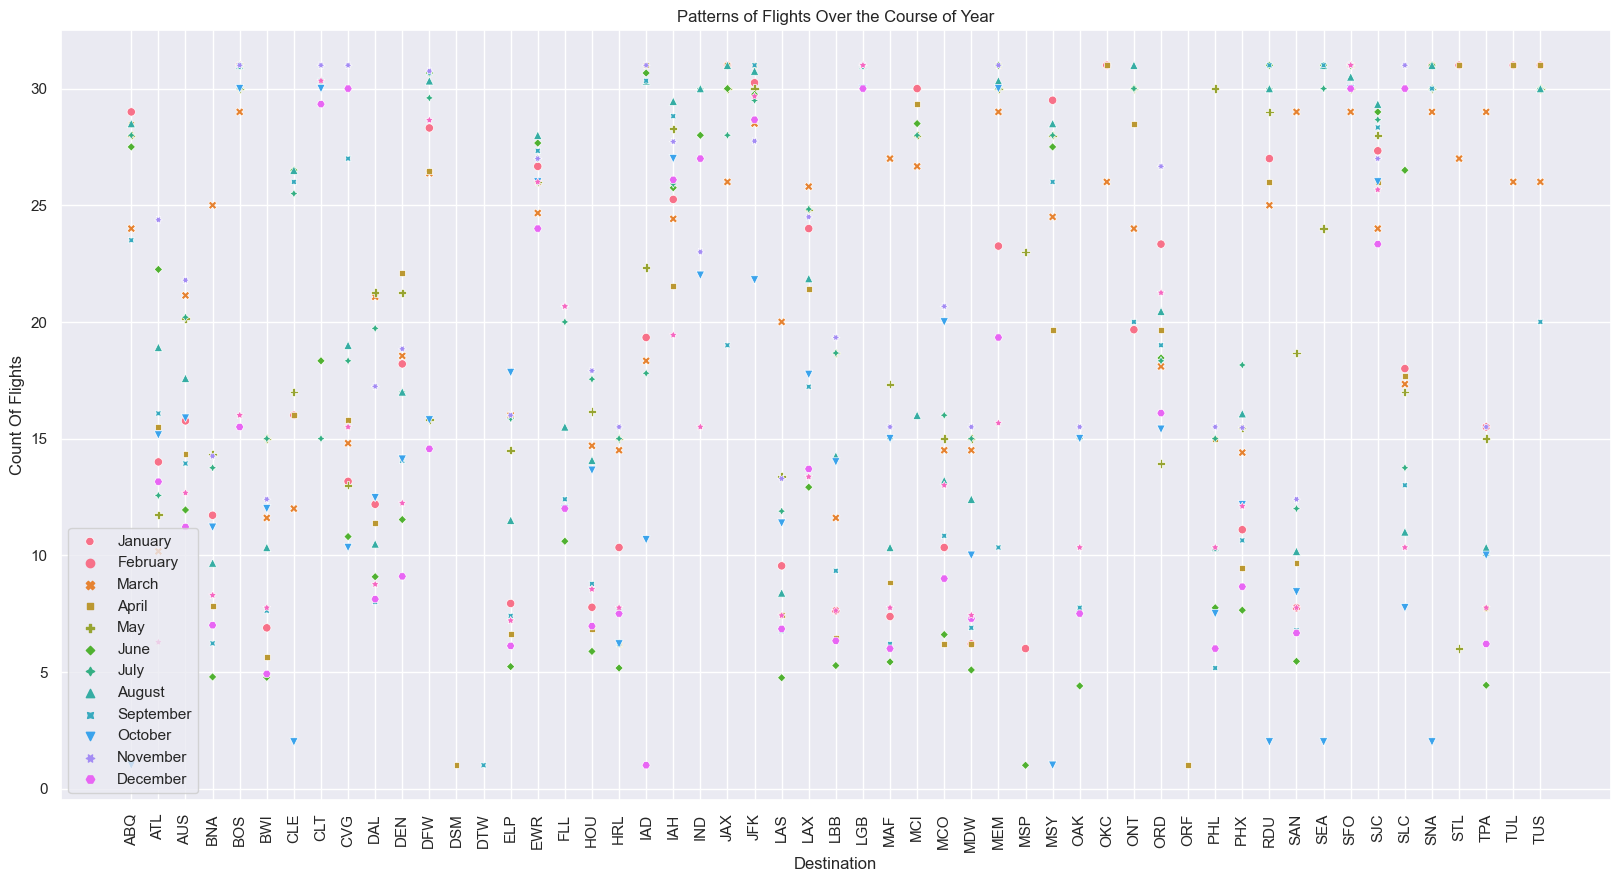

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.scatterplot(result1.groupby(
[result1['Dest'], 'Month'])['CountOfFlights'].mean().unstack(), linewidth=0.5,ax=ax)
# sns.barplot(TYResult.groupby(
# [TYResult['Dest'], 'Month'])['Min_Delay'].mean().unstack(), linewidth=0.5,ax=ax)
plt.xlabel('Destination')
plt.ylabel('Count Of Flights')
plt.title('Patterns of Flights Over the Course of Year')
plt.xticks(rotation=450)
plt.legend(Months)
plt.show()

<h2>Question 2

<h4>In this part we will examine the data containing information on every Olympic medallist that is
listed by participant count in top 20 sports, dating back to 1896. Load the dataset task2.txt and perform
statistical analysis on the dataset. Specifically, do the following:

In [ ]:
df = pd.read_csv("/Users/farjad.ahmed/Documents/Studies/ML Lab/Exercise_01/task2.txt")

In [ ]:
#Displaying all the necessary information from the file
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,16,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,17,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


<h4>Compute the 95th percentile of heights for the competitors in all Athletic events for gender Female.
Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint).

In [ ]:
df_1 = df[(df['sex']=='F') & (df['sport']=='Athletics') ]
df_1['height'].quantile(0.95)

183.0

<h4>Find the single woman’s event that depicts the highest variability in the height of the competitor
across the entire history of Olympics. Use the standard deviation as the yardstick for this.

In [ ]:
df_2 = df[(df['sex']=='F')]
#This could be done in two ways
#1
df_2.groupby('event')['height'].std().sort_values(ascending=False).reset_index(name='std').head(1)

,event,std
0,Rowing Women's Coxed Fours,10.86549


In [ ]:
#2
df_2 = df_2.groupby('event')['height'].std()
df_2 = df_2.to_frame()
df_2['height'].idxmax()

"Rowing Women's Coxed Fours"

<h4>We wish to know how the average age of swimmers in Olympic has evolved with time. How has this
changed over time? Does the trend for this differs from male to female? It will be easy to create a
data frame that will allow one to visualise these trends with time. Plot a line graph that depicts
separate line for male and female competitors. The plot must have a caption that is informative
enough to answer the 2 questions that have been asked in this part.

In [ ]:
#Creating two dataframes, one for females and the other for males
df_F = df[df['sex']=='F']
df_M = df[df['sex']=='M']

In [ ]:
df_M1 = df_M.groupby('year')['age'].agg('mean')
df_M1 = df_M1.to_frame()
# df_M1

In [ ]:
df_F1 = df_F.groupby('year')['age'].agg('mean')
df_F1 = df_F1.to_frame()
# df_F1

<h4>Here I see this is not the best method of doing this, I will have to join these two dataframes for female avg ages and male avg ages. Instead I found an easier method by using unstack to do this, shown below.

In [ ]:
df_s = df[(df['sport']=='Swimming')]

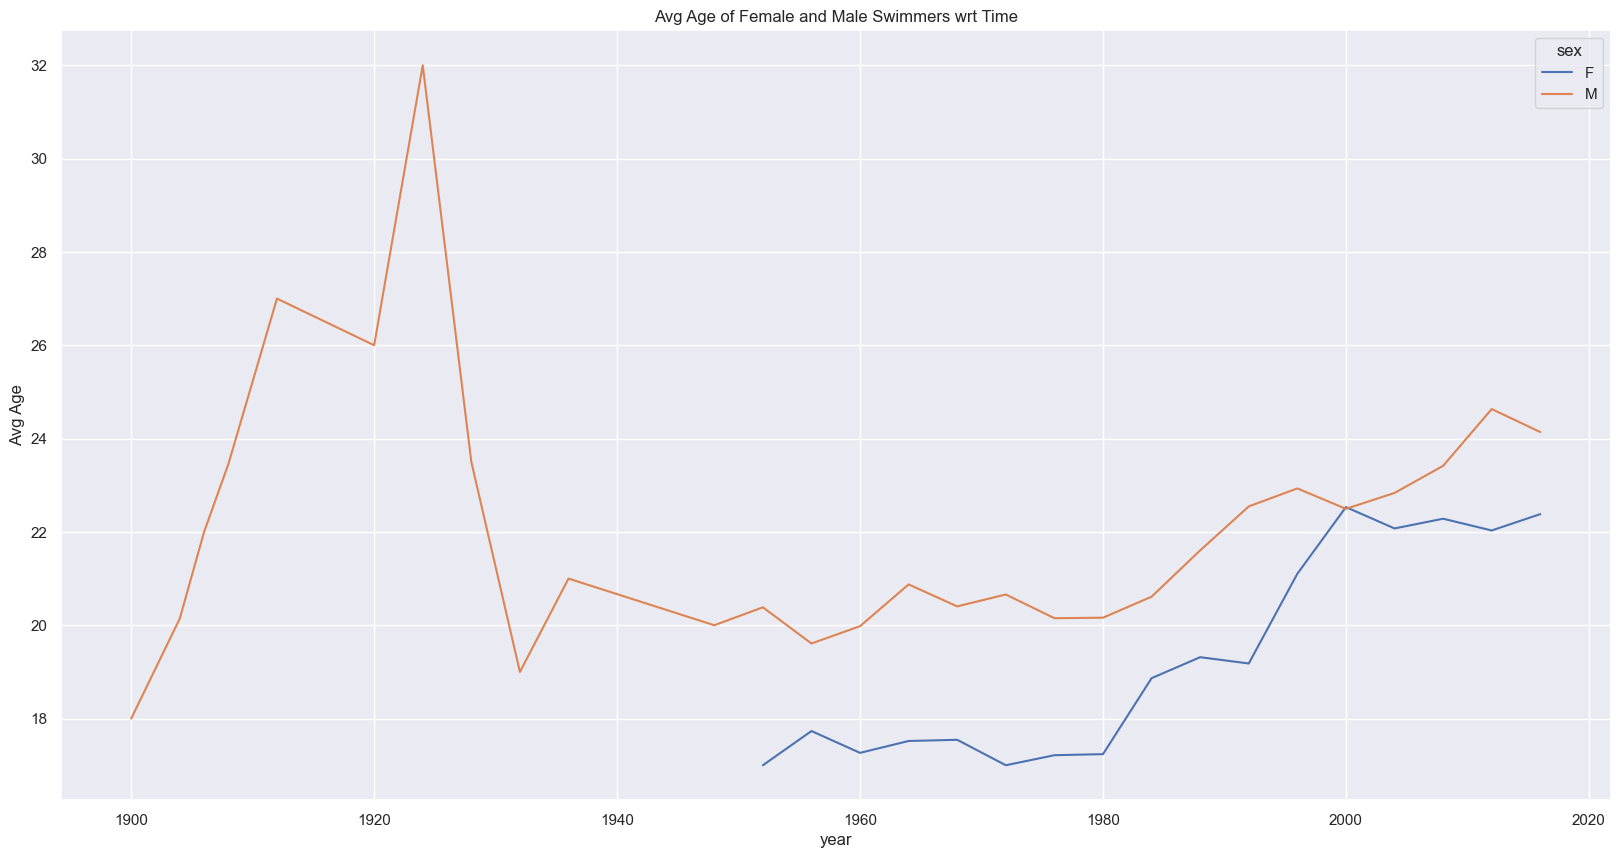

In [ ]:
# This is an easy way of doing this
sns.set(rc={'figure.figsize':(20,10)})
out = df_s.groupby(['year','sex'])['age'].agg('mean').unstack()
out.plot(xlabel='year', ylabel='Avg Age', title='Avg Age of Female and Male Swimmers wrt Time')
plt.show()